<a href="https://colab.research.google.com/github/debashisdotchatterjee/Circular-Monkeypox-Python/blob/main/Directional_Monkeypox_(Semi_Synthetic_%2BReal_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directional Statistical Analysis of Gene Distribution in the Monkeypox Virus Genome

## Introduction

This Python code implements the methodologies described in the research paper for analyzing the spatial distribution and orientation of genes in the Monkeypox virus genome using circular statistical methods. The code performs the following steps:

1. Parses the genomic dataset and extracts gene positions and orientations.
2. Maps linear gene positions to circular coordinates.
3. Performs Rayleigh's test for uniformity in gene distribution.
4. Fits the von Mises distribution to the gene positions.
5. Conducts circular kernel density estimation (CKDE).
6. Analyzes orientation bias using circular regression.
7. Detects functional clustering among genes.
8. Detects periodicity in gene distribution using circular autocorrelation.
9. Generates plots and tables, saving them in a separate folder for visualization.

In [ ]:
pip install numpy pandas matplotlib biopython scipy statsmodels pycircstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.4 MB/s eta 0:00:00


In [25]:
!pip install biopython

In [ ]:
!pip install pycircstat

In [ ]:
!pip install nose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.9 MB/s eta 0:00:00


Semi Synthetic Dataset -Based Analysis

Synthetic Dataset Creation
We'll create a synthetic dataset with gene positions distributed around a circular genome of length 195,586 bp (the size of the Monkeypox virus genome). We'll simulate gene positions, orientations, and products to match the characteristics of real data as closely as possible.

Synthetic gene information generated and saved to 'synthetic_gene_info.csv'.
Angular coordinates and orientations calculated.


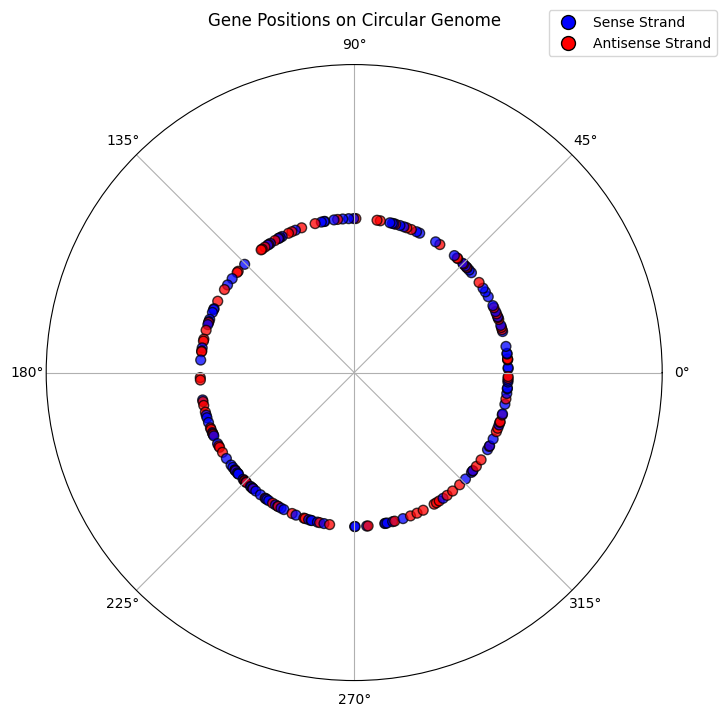

Circular gene position plot saved as 'gene_positions_circular.png'.
Rayleigh's Test Statistic Z: 0.5235
P-value: 5.9243e-01
Fail to reject H0: The gene positions are uniformly distributed.
Estimated Mean Direction (mu): 4.2149 radians
Estimated Concentration Parameter (kappa): 0.1025


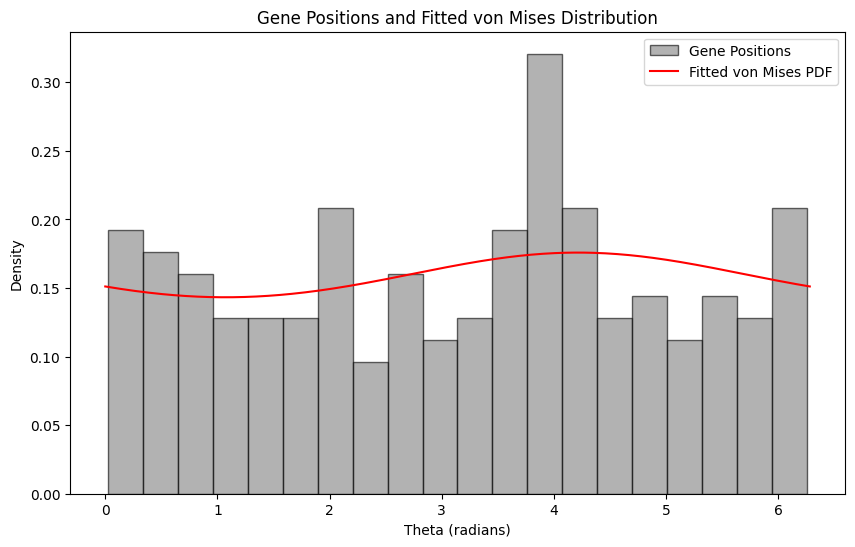

Von Mises distribution fit plot saved as 'von_mises_fit.png'.


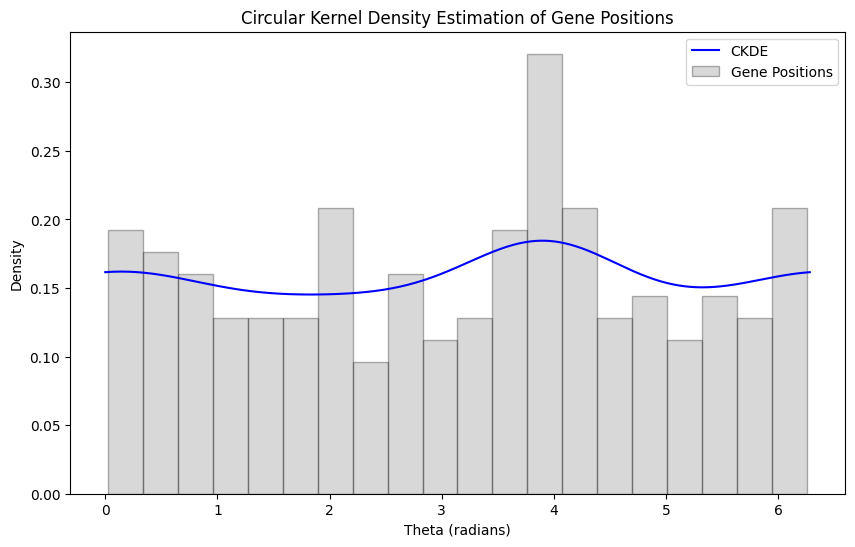

Circular Kernel Density Estimation plot saved as 'circular_kde.png'.
Circular Logistic Regression Results:
Beta0: 0.1808
Beta1: 0.0089
Phi (radians): -0.1714


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


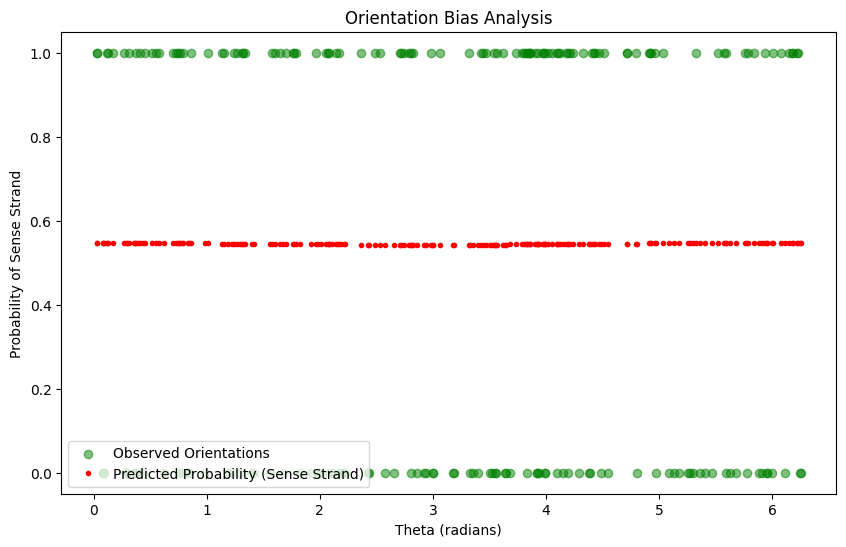

Orientation bias analysis plot saved as 'orientation_bias.png'.

Functional Clustering for Ankyrin Repeat Proteins:
Number of Genes: 37
Mean Resultant Length R: 0.1097
Test Statistic U^2: 0.4450
P-value: 6.4080e-01


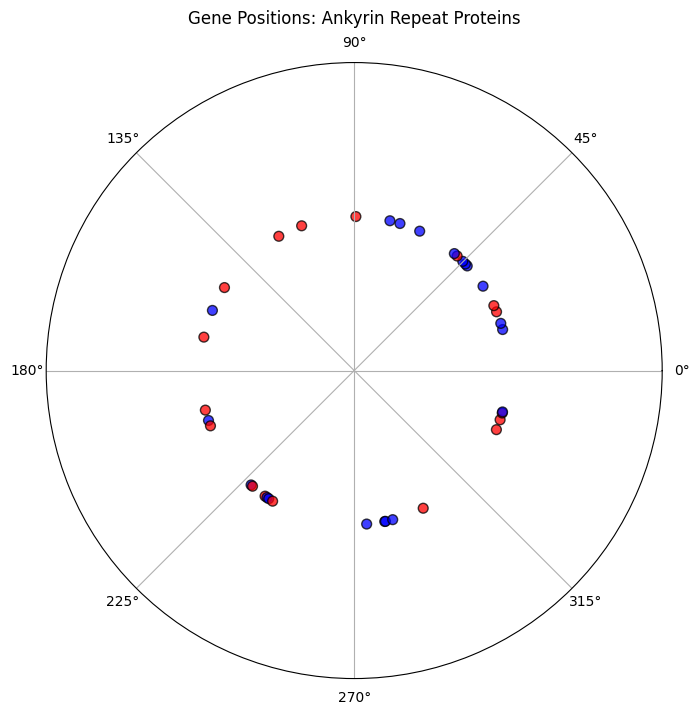

Functional clustering plot for Ankyrin Repeat Proteins saved as 'Ankyrin Repeat Proteins_circular_plot.png'.
Clustering results for Ankyrin Repeat Proteins saved as 'Ankyrin Repeat Proteins_clustering_results.csv'.

Functional Clustering for Bcl-2-like Proteins:
Number of Genes: 26
Mean Resultant Length R: 0.1687
Test Statistic U^2: 0.7402
P-value: 4.7701e-01


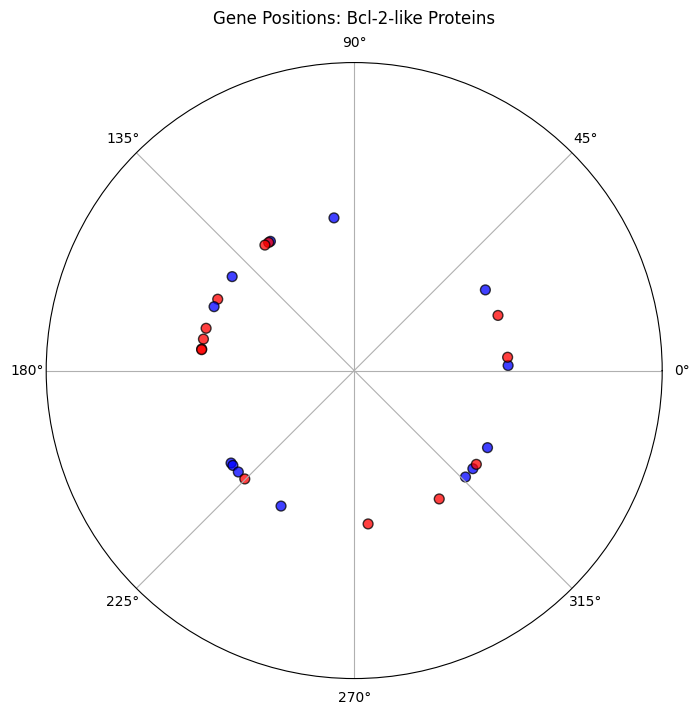

Functional clustering plot for Bcl-2-like Proteins saved as 'Bcl-2-like Proteins_circular_plot.png'.
Clustering results for Bcl-2-like Proteins saved as 'Bcl-2-like Proteins_clustering_results.csv'.

Functional Clustering for Chemokine Binding Proteins:
Number of Genes: 27
Mean Resultant Length R: 0.0876
Test Statistic U^2: 0.2070
P-value: 8.1304e-01


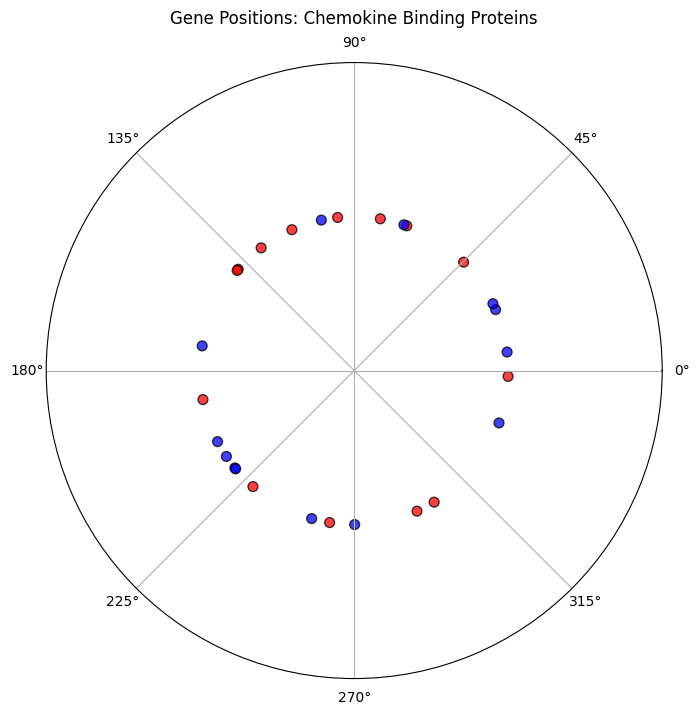

Functional clustering plot for Chemokine Binding Proteins saved as 'Chemokine Binding Proteins_circular_plot.png'.
Clustering results for Chemokine Binding Proteins saved as 'Chemokine Binding Proteins_clustering_results.csv'.

Functional Clustering for Crm-B Secreted Proteins:
Number of Genes: 41
Mean Resultant Length R: 0.1229
Test Statistic U^2: 0.6190
P-value: 5.3849e-01


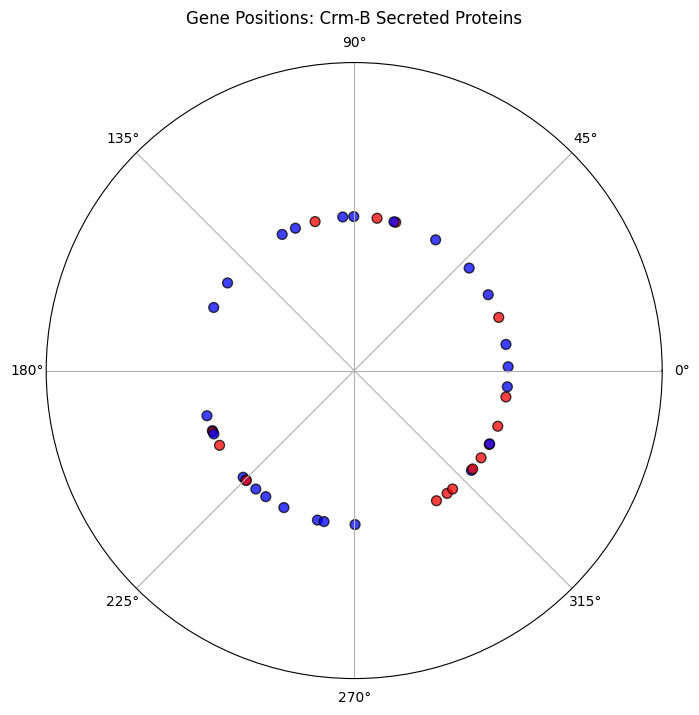

Functional clustering plot for Crm-B Secreted Proteins saved as 'Crm-B Secreted Proteins_circular_plot.png'.
Clustering results for Crm-B Secreted Proteins saved as 'Crm-B Secreted Proteins_clustering_results.csv'.

Functional Clustering for EGF-like Domain Proteins:
Number of Genes: 45
Mean Resultant Length R: 0.0452
Test Statistic U^2: 0.0920
P-value: 9.1211e-01


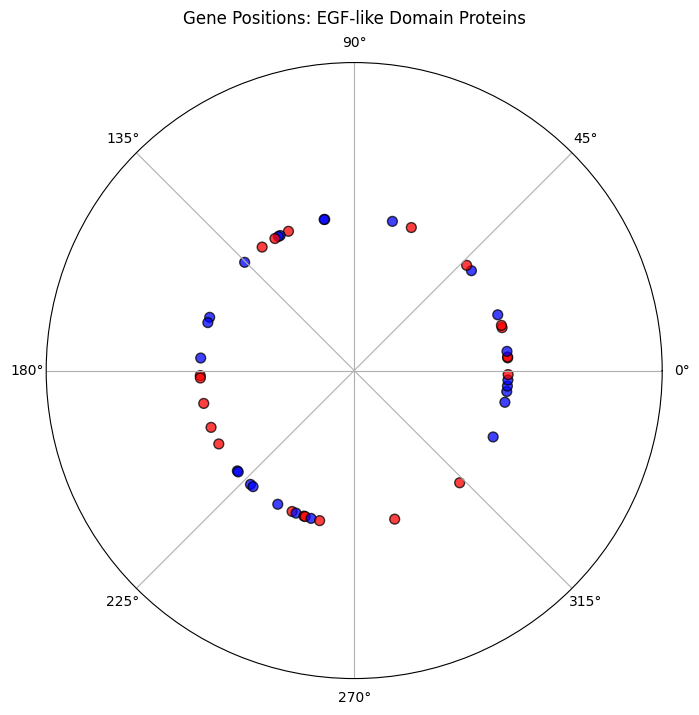

Functional clustering plot for EGF-like Domain Proteins saved as 'EGF-like Domain Proteins_circular_plot.png'.
Clustering results for EGF-like Domain Proteins saved as 'EGF-like Domain Proteins_clustering_results.csv'.


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1000x600 with 0 Axes>

In [26]:
# Directional Statistical Analysis of Gene Distribution in the Monkeypox Virus Genome

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import vonmises, chi2
from scipy.special import i0
from statsmodels.base.model import GenericLikelihoodModel
import pycircstat as circ

# Create a directory to save plots and tables
output_dir = 'monkeypox_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# -------------------------
# Creating a Synthetic Dataset
# -------------------------

# Set random seed for reproducibility
np.random.seed(42)

# Define genome length
genome_length = 195586  # Total length of the genome in base pairs
L = genome_length  # Alias for clarity

# Number of genes to simulate
n_genes = 200

# Simulate gene positions uniformly around the genome
gene_starts = np.sort(np.random.randint(1, L+1, size=n_genes))

# Simulate gene ends (ensure they are after the starts but within the genome length)
gene_lengths = np.random.randint(500, 2000, size=n_genes)  # Random gene lengths between 500 and 2000 bp
gene_ends = (gene_starts + gene_lengths) % L  # Wrap around if exceeding genome length

# Simulate strand orientations randomly (-1 or 1)
strands = np.random.choice([-1, 1], size=n_genes)

# Simulate gene names and products
gene_names = [f"Gene_{i+1}" for i in range(n_genes)]
product_descriptions = np.random.choice([
    'Ankyrin repeat protein', 'Bcl-2-like protein', 'Chemokine binding protein',
    'Crm-B secreted protein', 'EGF-like domain protein', 'Other protein'], size=n_genes)

# Create the DataFrame
genes_df = pd.DataFrame({
    'start': gene_starts,
    'end': gene_ends,
    'strand': strands,
    'gene': gene_names,
    'product': product_descriptions
})

# Save synthetic gene information to a CSV file
genes_df.to_csv(os.path.join(output_dir, 'synthetic_gene_info.csv'), index=False)
print("Synthetic gene information generated and saved to 'synthetic_gene_info.csv'.")

# -------------------------
# Mapping Linear Positions to Circular Coordinates
# -------------------------

# Calculate angular coordinates
genes_df['position'] = genes_df['start']
genes_df['theta'] = 2 * np.pi * (genes_df['position'] % L) / L  # Angular coordinate in radians

# Map strand to orientation
# Sense strand (+1), Antisense strand (-1)
genes_df['orientation'] = genes_df['strand']

print("Angular coordinates and orientations calculated.")

# -------------------------
# Plotting Gene Positions on Circular Coordinate System
# -------------------------

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
colors = genes_df['orientation'].map({1: 'blue', -1: 'red'})
ax.scatter(genes_df['theta'], np.ones_like(genes_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k', label='Genes')
ax.set_title('Gene Positions on Circular Genome', va='bottom')
ax.set_yticks([])  # Hide radial ticks

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sense Strand',
           markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Antisense Strand',
           markerfacecolor='red', markersize=10, markeredgecolor='k')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig(os.path.join(output_dir, 'gene_positions_circular.png'), bbox_inches='tight')
plt.show()
print("Circular gene position plot saved as 'gene_positions_circular.png'.")

# -------------------------
# Testing for Uniformity in Gene Distribution (Rayleigh's Test)
# -------------------------

# Compute mean resultant length R
n = len(genes_df)
C_bar = np.mean(np.cos(genes_df['theta']))
S_bar = np.mean(np.sin(genes_df['theta']))
R = np.sqrt(C_bar**2 + S_bar**2)

# Rayleigh's test statistic
Z = n * R**2

# P-value approximation for large n
p_value = np.exp(-Z)

print(f"Rayleigh's Test Statistic Z: {Z:.4f}")
print(f"P-value: {p_value:.4e}")

# Check significance
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject H0: The gene positions are not uniformly distributed."
else:
    conclusion = "Fail to reject H0: The gene positions are uniformly distributed."

print(conclusion)

# -------------------------
# Fitting the von Mises Distribution
# -------------------------

# Estimate parameters
theta_hat = np.arctan2(S_bar, C_bar)
if theta_hat < 0:
    theta_hat += 2 * np.pi  # Ensure theta_hat is in [0, 2pi)

R_bar = R

# Estimate kappa using the approximation based on R_bar
if R_bar < 0.53:
    kappa_hat = 2 * R_bar + R_bar**3 + (5 * R_bar**5) / 6
elif R_bar < 0.85:
    kappa_hat = -0.4 + 1.39 * R_bar + (0.43 / (1 - R_bar))
else:
    kappa_hat = 1 / (R_bar**3 - 4 * R_bar**2 + 3 * R_bar)

print(f"Estimated Mean Direction (mu): {theta_hat:.4f} radians")
print(f"Estimated Concentration Parameter (kappa): {kappa_hat:.4f}")

# Probability Density Function of von Mises
theta_grid = np.linspace(0, 2 * np.pi, 360)
pdf_values = vonmises.pdf(theta_grid, kappa_hat, loc=theta_hat)

# Plot histogram and fitted von Mises PDF
plt.figure(figsize=(10, 6))
plt.hist(genes_df['theta'], bins=20, density=True, alpha=0.6, color='gray', edgecolor='black', label='Gene Positions')

plt.plot(theta_grid, pdf_values, 'r-', label='Fitted von Mises PDF')
plt.title('Gene Positions and Fitted von Mises Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_dir, 'von_mises_fit.png'), bbox_inches='tight')
plt.show()
print("Von Mises distribution fit plot saved as 'von_mises_fit.png'.")

# -------------------------
# Circular Kernel Density Estimation (CKDE)
# -------------------------

# Using von Mises kernel for CKDE
def circular_kde(theta_values, bandwidth=0.5, theta_grid=np.linspace(0, 2*np.pi, 360)):
    kde = np.zeros_like(theta_grid)
    for theta in theta_values:
        kde += vonmises.pdf(theta_grid, kappa=1/bandwidth, loc=theta)
    kde /= len(theta_values)
    return kde

bandwidth = 0.5
kde_values = circular_kde(genes_df['theta'].values, bandwidth=bandwidth, theta_grid=theta_grid)

plt.figure(figsize=(10, 6))
plt.plot(theta_grid, kde_values, 'b-', label='CKDE')
plt.hist(genes_df['theta'], bins=20, density=True, alpha=0.3, color='gray', edgecolor='black', label='Gene Positions')
plt.title('Circular Kernel Density Estimation of Gene Positions')
plt.xlabel('Theta (radians)')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_dir, 'circular_kde.png'), bbox_inches='tight')
plt.show()
print("Circular Kernel Density Estimation plot saved as 'circular_kde.png'.")

# -------------------------
# Orientation Bias Analysis Using Circular Regression
# -------------------------

# Define the circular logistic regression model
class CircularLogisticRegression(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwargs):
        super().__init__(endog, exog, **kwargs)

    def loglike(self, params):
        beta0, beta1, phi = params
        theta = self.endog[:, 0]
        y = self.endog[:, 1]
        eta = beta0 + beta1 * np.cos(theta - phi)
        p = 1 / (1 + np.exp(-eta))
        # Avoid log(0) by adding a small epsilon
        epsilon = 1e-10
        ll = y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon)
        return np.sum(ll)

# Prepare data
theta = genes_df['theta'].values
y = (genes_df['orientation'] == 1).astype(int).values  # 1 for sense, 0 for antisense
endog = np.column_stack((theta, y))

# Initial parameter guesses: beta0, beta1, phi
initial_params = [0.0, 0.0, 0.0]

# Fit the model
model = CircularLogisticRegression(endog, None)
try:
    result = model.fit(start_params=initial_params, disp=False)
    beta0_hat, beta1_hat, phi_hat = result.params

    print("Circular Logistic Regression Results:")
    print(f"Beta0: {beta0_hat:.4f}")
    print(f"Beta1: {beta1_hat:.4f}")
    print(f"Phi (radians): {phi_hat:.4f}")

    # Predicted probabilities
    eta = beta0_hat + beta1_hat * np.cos(theta - phi_hat)
    p_hat = 1 / (1 + np.exp(-eta))

    # Plotting the orientation probabilities
    plt.figure(figsize=(10, 6))
    plt.scatter(theta, y, alpha=0.5, label='Observed Orientations', color='green')
    sorted_indices = np.argsort(theta)
    plt.plot(theta[sorted_indices], p_hat[sorted_indices], 'r.', label='Predicted Probability (Sense Strand)')
    plt.title('Orientation Bias Analysis')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Probability of Sense Strand')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'orientation_bias.png'), bbox_inches='tight')
    plt.show()
    print("Orientation bias analysis plot saved as 'orientation_bias.png'.")
except Exception as e:
    print(f"An error occurred during circular logistic regression: {e}")

# -------------------------
# Functional Clustering Detection
# -------------------------

# Group genes by functional category
functional_groups = {
    'Ankyrin Repeat Proteins': genes_df[genes_df['product'].str.contains('Ankyrin', case=False, na=False)],
    'Bcl-2-like Proteins': genes_df[genes_df['product'].str.contains('Bcl-2-like', case=False, na=False)],
    'Chemokine Binding Proteins': genes_df[genes_df['product'].str.contains('Chemokine', case=False, na=False)],
    'Crm-B Secreted Proteins': genes_df[genes_df['product'].str.contains('Crm-B', case=False, na=False)],
    'EGF-like Domain Proteins': genes_df[genes_df['product'].str.contains('EGF-like', case=False, na=False)],
}

# Function to perform clustering test
def clustering_test(group_df, group_name, output_dir):
    n_j = len(group_df)
    if n_j < 2:
        print(f"Not enough genes in {group_name} for clustering test.")
        return
    theta_j = group_df['theta'].values
    R_j = np.abs(np.sum(np.exp(1j * theta_j)) / n_j)
    U2_j = n_j * R_j**2
    p_value_j = np.exp(-U2_j)

    print(f"\nFunctional Clustering for {group_name}:")
    print(f"Number of Genes: {n_j}")
    print(f"Mean Resultant Length R: {R_j:.4f}")
    print(f"Test Statistic U^2: {U2_j:.4f}")
    print(f"P-value: {p_value_j:.4e}")

    # Plotting the distribution
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    colors = group_df['orientation'].map({1: 'blue', -1: 'red'})
    ax.scatter(group_df['theta'], np.ones_like(group_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k')
    ax.set_title(f'Gene Positions: {group_name}', va='bottom')
    ax.set_yticks([])
    plt.savefig(os.path.join(output_dir, f'{group_name}_circular_plot.png'), bbox_inches='tight')
    plt.show()
    print(f"Functional clustering plot for {group_name} saved as '{group_name}_circular_plot.png'.")

    # Save results to a CSV file
    result_df = pd.DataFrame({
        'Functional Group': [group_name],
        'Number of Genes': [n_j],
        'Mean Resultant Length (R)': [R_j],
        'Test Statistic (U^2)': [U2_j],
        'P-value': [p_value_j],
        'Conclusion': ['Significant Clustering' if p_value_j < 0.05 else 'No Significant Clustering']
    })
    result_df.to_csv(os.path.join(output_dir, f'{group_name}_clustering_results.csv'), index=False)
    print(f"Clustering results for {group_name} saved as '{group_name}_clustering_results.csv'.")

# Perform clustering tests for each functional group
for group_name, group_df in functional_groups.items():
    clustering_test(group_df, group_name, output_dir)

# -------------------------
# Periodicity Detection Using Circular Autocorrelation
# -------------------------

# Compute circular autocorrelation
def circular_autocorrelation(theta_values, max_lag=20):
    n = len(theta_values)
    rho = []
    for delta in range(1, max_lag + 1):
        theta_shifted = np.roll(theta_values, -delta)
        numerator = np.sum(np.sin(theta_values - theta_shifted))
        denominator = np.sum(np.sin(theta_values)**2)
        rho_delta = numerator / denominator
        rho.append(rho_delta)
    return rho

max_lag = 20
rho_values = circular_autocorrelation(theta, max_lag)

# Plot the autocorrelation function
lags = np.arange(1, max_lag + 1)
plt.figure(figsize=(10, 6))
plt.stem(lags, rho_values, use_line_collection=True, basefmt=" ")
plt.title('Circular Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig(os.path.join(output_dir, 'circular_autocorrelation.png'), bbox_inches='tight')
plt.show()
print("Circular autocorrelation plot saved as 'circular_autocorrelation.png'.")

# -------------------------
# Spectral Analysis
# -------------------------

# Perform Fourier analysis
n = len(theta)
F_k = np.abs(np.fft.fft(np.exp(1j * theta))) / n
k_values = np.arange(1, n + 1)

# Only consider the first half of the spectrum
half_n = n // 2
plt.figure(figsize=(10, 6))
plt.plot(k_values[:half_n], F_k[:half_n])
plt.title('Fourier Spectrum of Gene Positions')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.savefig(os.path.join(output_dir, 'fourier_spectrum.png'), bbox_inches='tight')
plt.show()
print("Fourier spectrum plot saved as 'fourier_spectrum.png'.")

# -------------------------
# Additional Plots: Rose Plot
# -------------------------

# Create a rose plot (circular histogram)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
num_bins = 36  # 10-degree bins
bins = np.linspace(0.0, 2 * np.pi, num_bins + 1)
counts, bin_edges = np.histogram(genes_df['theta'], bins=bins)
width = (2 * np.pi) / num_bins
ax.bar(bin_edges[:-1], counts, width=width, bottom=0.0, color='cyan', edgecolor='k', alpha=0.7)
ax.set_title('Rose Plot of Gene Positions', va='bottom')
plt.savefig(os.path.join(output_dir, 'rose_plot.png'), bbox_inches='tight')
plt.show()
print("Rose plot saved as 'rose_plot.png'.")

# -------------------------
# Saving Summary Tables
# -------------------------

# Summary of Rayleigh's Test
rayleigh_summary = pd.DataFrame({
    'Test': ["Rayleigh's Test"],
    'Statistic Z': [Z],
    'P-value': [p_value],
    'Conclusion': [conclusion]
})
rayleigh_summary.to_csv(os.path.join(output_dir, 'rayleigh_test_summary.csv'), index=False)
print("Rayleigh's test summary saved as 'rayleigh_test_summary.csv'.")

# Summary of von Mises Fit
vonmises_summary = pd.DataFrame({
    'Parameter': ['mu (radians)', 'kappa'],
    'Estimate': [theta_hat, kappa_hat]
})
vonmises_summary.to_csv(os.path.join(output_dir, 'von_mises_fit_summary.csv'), index=False)
print("Von Mises fit summary saved as 'von_mises_fit_summary.csv'.")

print("\nAll analyses completed successfully.")
print(f"Plots and tables are saved in the '{output_dir}' directory.")


Synthetic gene information generated and saved to 'synthetic_gene_info.csv'.
Angular coordinates and orientations calculated.


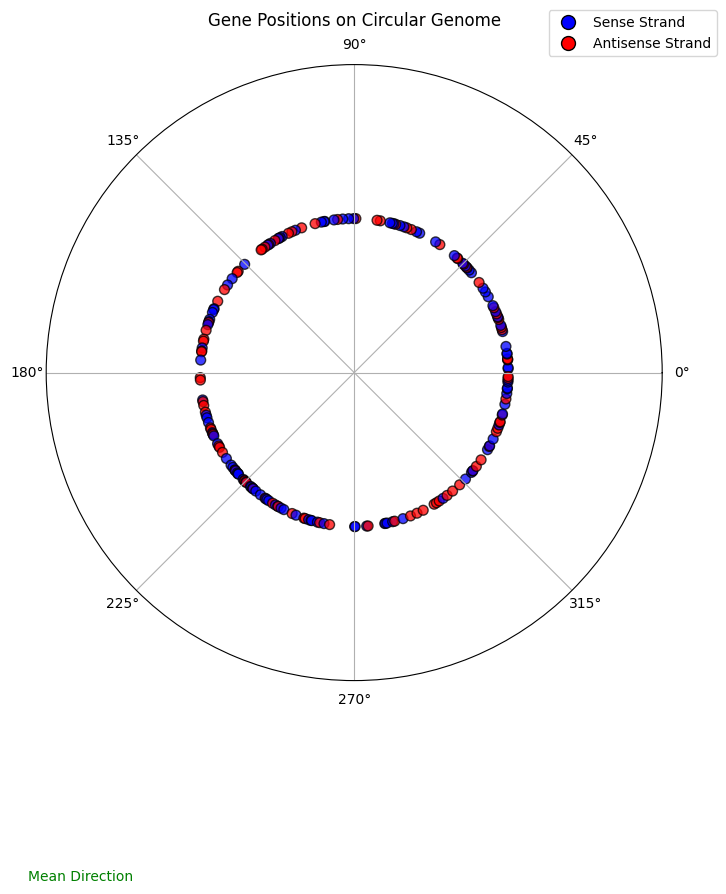

Circular gene position plot saved as 'gene_positions_circular.png'.
Rayleigh's Test Statistic Z: 0.5235
P-value: 5.9243e-01
Fail to reject H0: The gene positions are uniformly distributed.
Estimated Mean Direction (mu): 4.2149 radians
Estimated Concentration Parameter (kappa): 0.1025


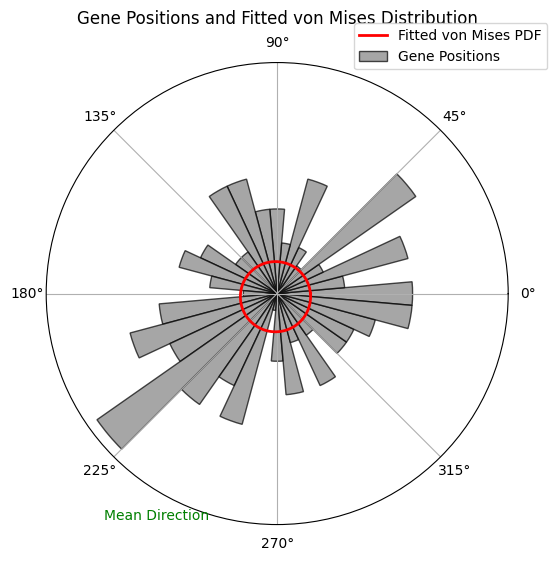

Von Mises distribution fit plot saved as 'von_mises_fit.png'.


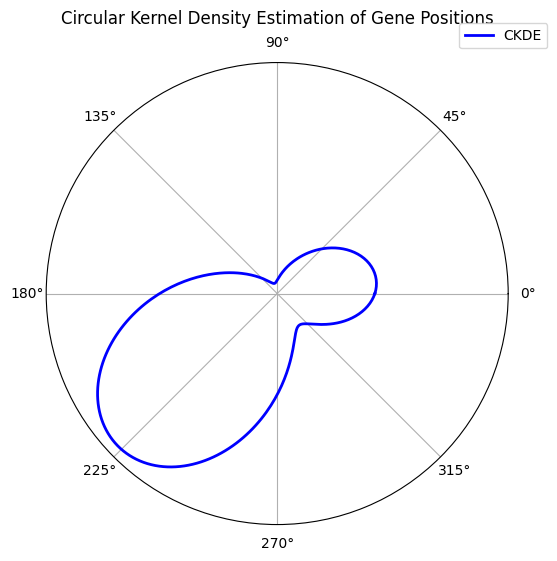

Circular Kernel Density Estimation plot saved as 'circular_kde.png'.
Circular Logistic Regression Results:
Beta0: 0.1808
Beta1: 0.0089
Phi (radians): -0.1714


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


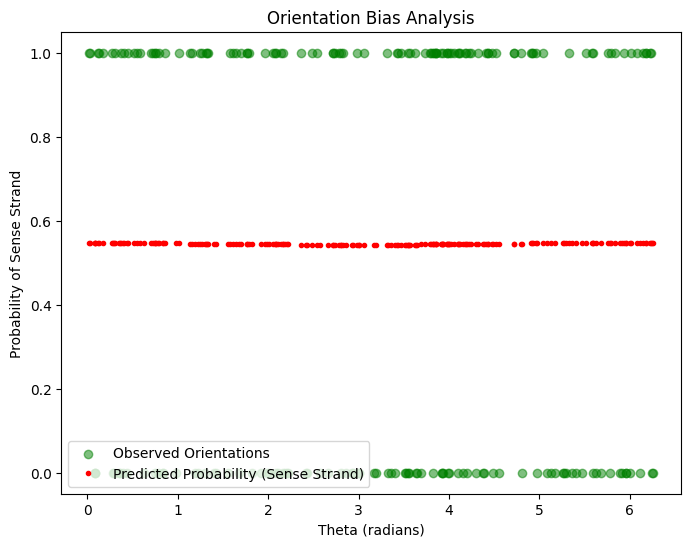

Orientation bias analysis plot saved as 'orientation_bias.png'.

Functional Clustering for Ankyrin Repeat Proteins:
Number of Genes: 37
Mean Resultant Length R: 0.1097
Test Statistic U^2: 0.4450
P-value: 6.4080e-01


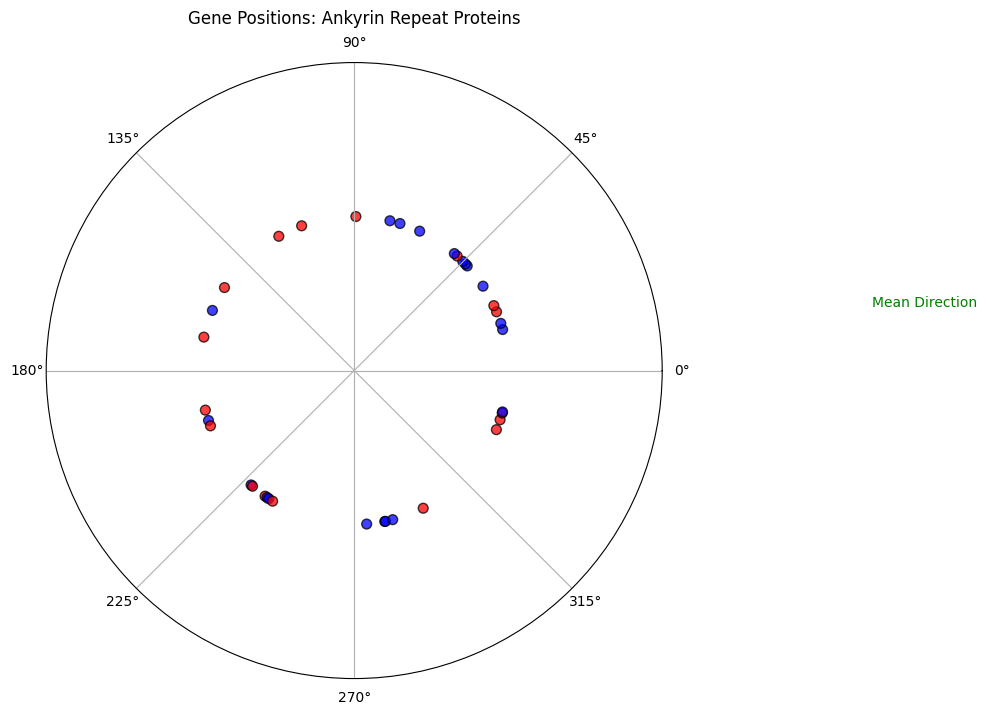

Functional clustering plot for Ankyrin Repeat Proteins saved as 'Ankyrin Repeat Proteins_circular_plot.png'.
Clustering results for Ankyrin Repeat Proteins saved as 'Ankyrin Repeat Proteins_clustering_results.csv'.

Functional Clustering for Bcl-2-like Proteins:
Number of Genes: 26
Mean Resultant Length R: 0.1687
Test Statistic U^2: 0.7402
P-value: 4.7701e-01


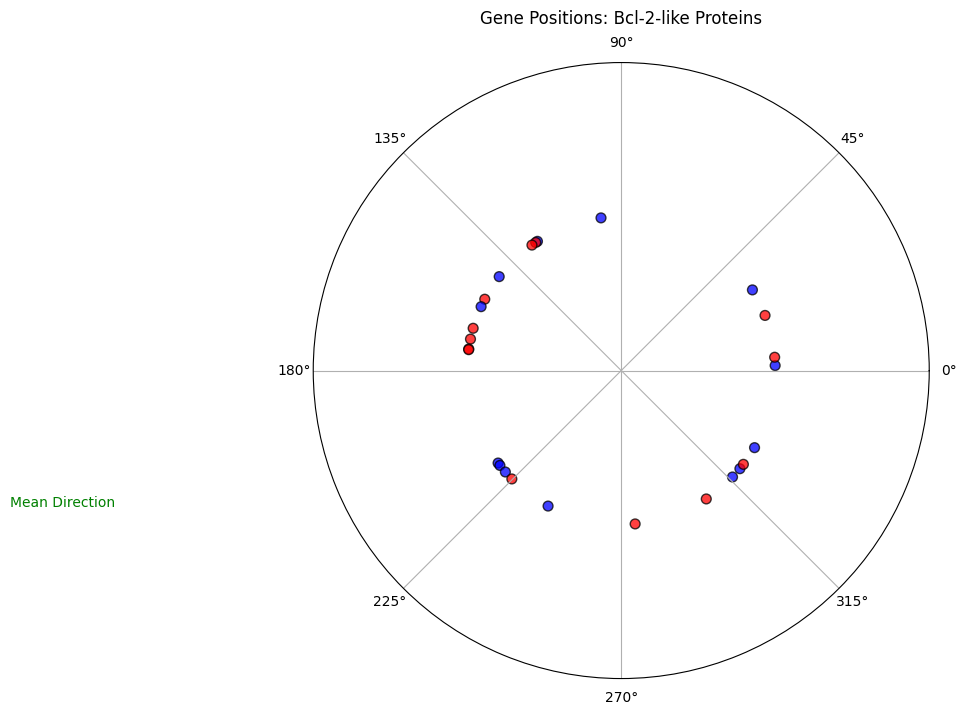

Functional clustering plot for Bcl-2-like Proteins saved as 'Bcl-2-like Proteins_circular_plot.png'.
Clustering results for Bcl-2-like Proteins saved as 'Bcl-2-like Proteins_clustering_results.csv'.

Functional Clustering for Chemokine Binding Proteins:
Number of Genes: 27
Mean Resultant Length R: 0.0876
Test Statistic U^2: 0.2070
P-value: 8.1304e-01


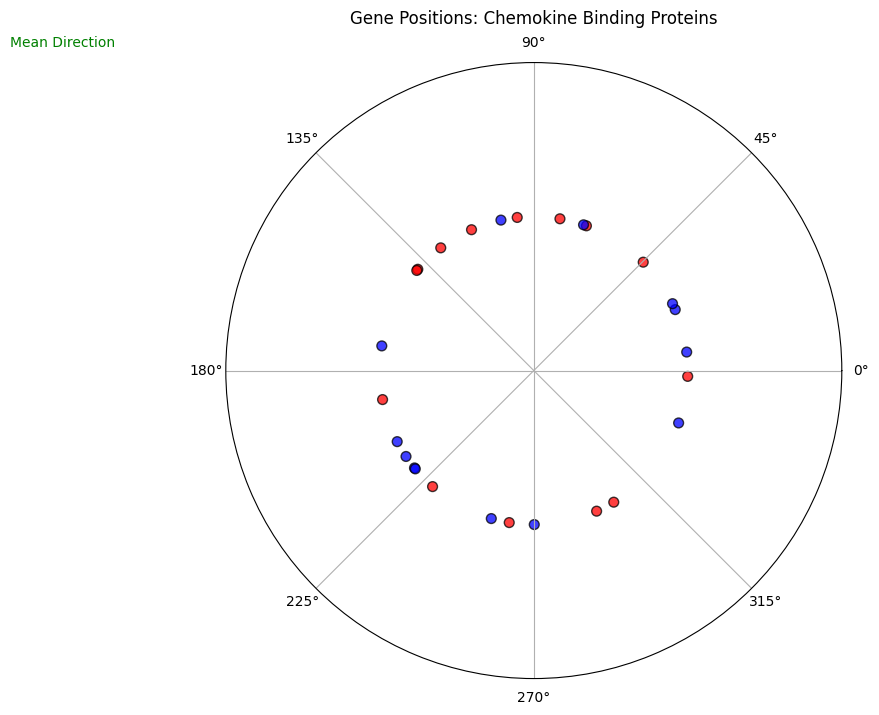

Functional clustering plot for Chemokine Binding Proteins saved as 'Chemokine Binding Proteins_circular_plot.png'.
Clustering results for Chemokine Binding Proteins saved as 'Chemokine Binding Proteins_clustering_results.csv'.

Functional Clustering for Crm-B Secreted Proteins:
Number of Genes: 41
Mean Resultant Length R: 0.1229
Test Statistic U^2: 0.6190
P-value: 5.3849e-01


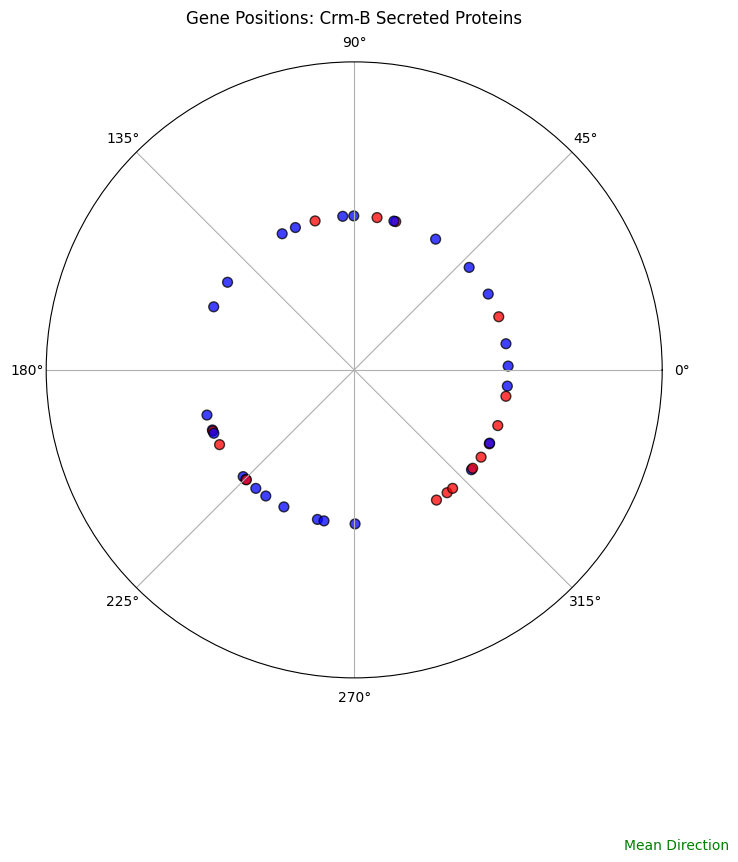

Functional clustering plot for Crm-B Secreted Proteins saved as 'Crm-B Secreted Proteins_circular_plot.png'.
Clustering results for Crm-B Secreted Proteins saved as 'Crm-B Secreted Proteins_clustering_results.csv'.

Functional Clustering for EGF-like Domain Proteins:
Number of Genes: 45
Mean Resultant Length R: 0.0452
Test Statistic U^2: 0.0920
P-value: 9.1211e-01


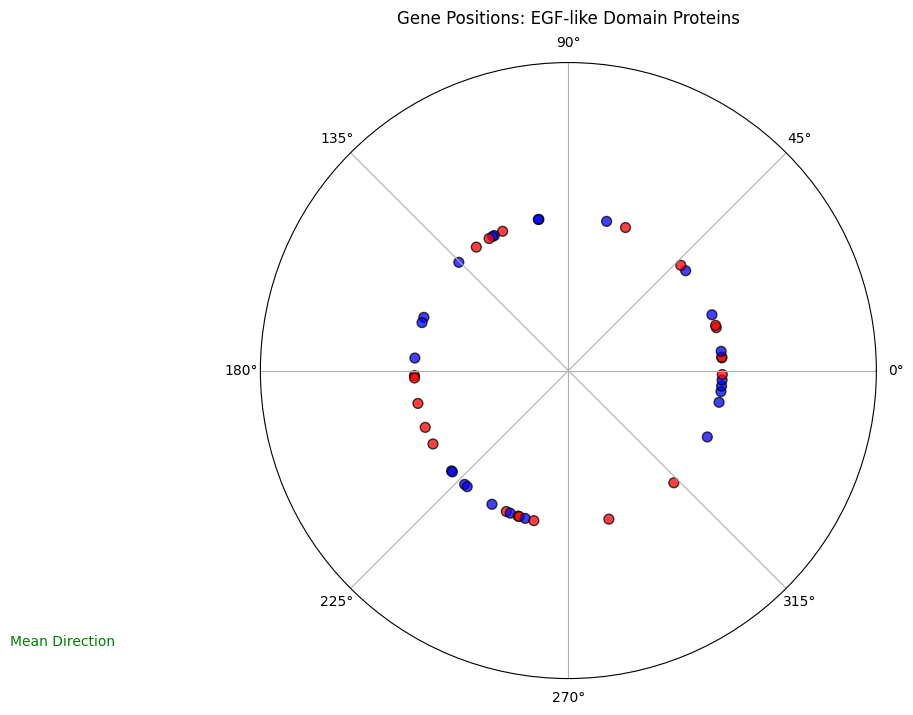

Functional clustering plot for EGF-like Domain Proteins saved as 'EGF-like Domain Proteins_circular_plot.png'.
Clustering results for EGF-like Domain Proteins saved as 'EGF-like Domain Proteins_clustering_results.csv'.


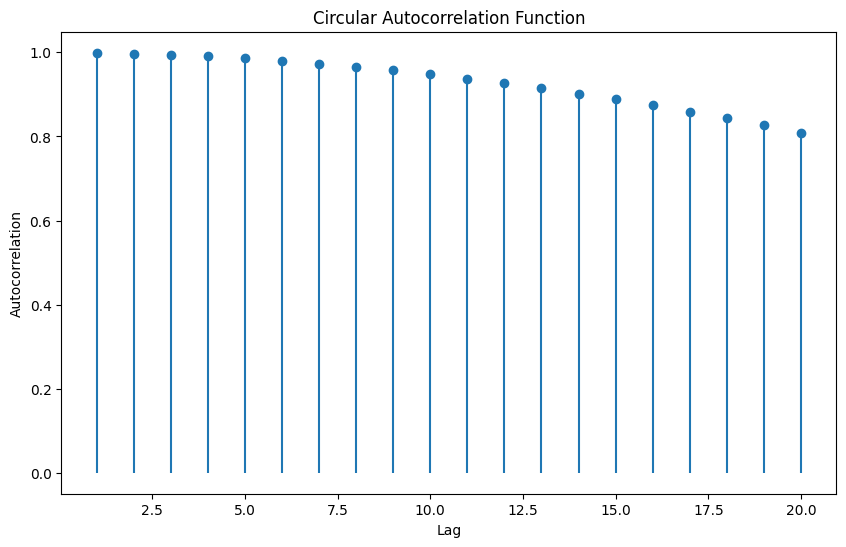

Circular autocorrelation plot saved as 'circular_autocorrelation.png'.


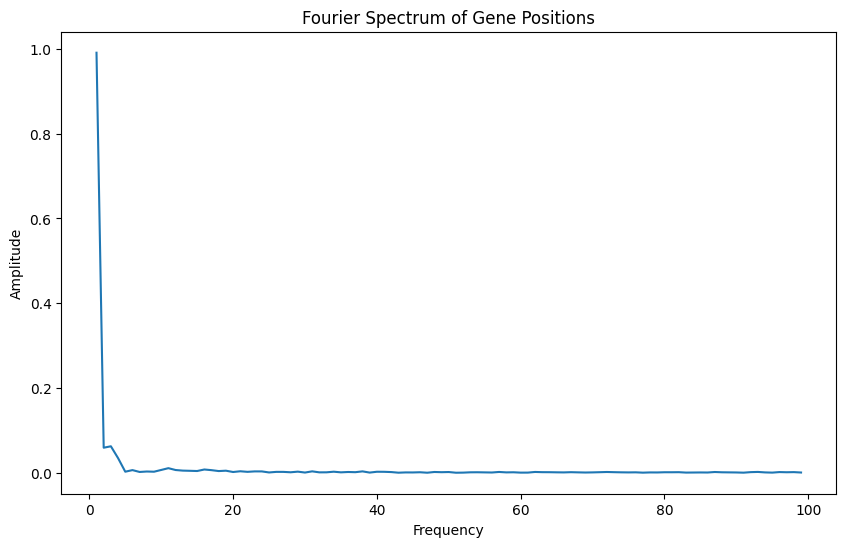

Fourier spectrum plot saved as 'fourier_spectrum.png'.


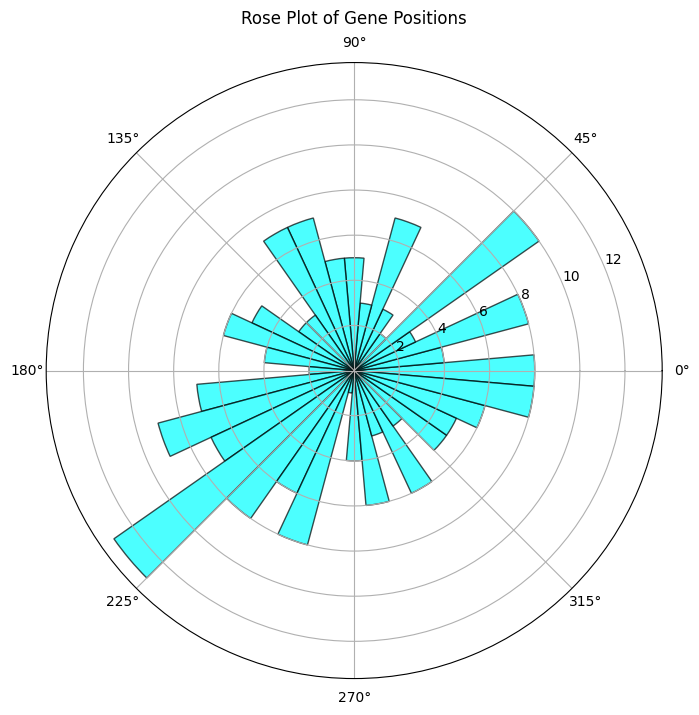

Rose plot saved as 'rose_plot.png'.
Rayleigh's test summary saved as 'rayleigh_test_summary.csv'.
Von Mises fit summary saved as 'von_mises_fit_summary.csv'.

All analyses completed successfully.
Plots and tables are saved in the 'monkeypox_analysis_outputs' directory.


In [ ]:
# Directional Statistical Analysis of Gene Distribution in the Monkeypox Virus Genome

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import vonmises, chi2
from scipy.special import i0
from statsmodels.base.model import GenericLikelihoodModel
import pycircstat as circ

# Create a directory to save plots and tables
output_dir = 'monkeypox_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# -------------------------
# Creating a Synthetic Dataset
# -------------------------

# Set random seed for reproducibility
np.random.seed(42)

# Define genome length
genome_length = 195586  # Total length of the genome in base pairs
L = genome_length  # Alias for clarity

# Number of genes to simulate
n_genes = 200

# Simulate gene positions uniformly around the genome
gene_starts = np.sort(np.random.randint(1, L+1, size=n_genes))

# Simulate gene ends (ensure they are after the starts but within the genome length)
gene_lengths = np.random.randint(500, 2000, size=n_genes)  # Random gene lengths between 500 and 2000 bp
gene_ends = (gene_starts + gene_lengths) % L  # Wrap around if exceeding genome length

# Simulate strand orientations randomly (-1 or 1)
strands = np.random.choice([-1, 1], size=n_genes)

# Simulate gene names and products
gene_names = [f"Gene_{i+1}" for i in range(n_genes)]
product_descriptions = np.random.choice([
    'Ankyrin repeat protein', 'Bcl-2-like protein', 'Chemokine binding protein',
    'Crm-B secreted protein', 'EGF-like domain protein', 'Other protein'], size=n_genes)

# Create the DataFrame
genes_df = pd.DataFrame({
    'start': gene_starts,
    'end': gene_ends,
    'strand': strands,
    'gene': gene_names,
    'product': product_descriptions
})

# Save synthetic gene information to a CSV file
genes_df.to_csv(os.path.join(output_dir, 'synthetic_gene_info.csv'), index=False)
print("Synthetic gene information generated and saved to 'synthetic_gene_info.csv'.")

# -------------------------
# Mapping Linear Positions to Circular Coordinates
# -------------------------

# Calculate angular coordinates
genes_df['position'] = genes_df['start']
genes_df['theta'] = 2 * np.pi * (genes_df['position'] % L) / L  # Angular coordinate in radians

# Map strand to orientation
# Sense strand (+1), Antisense strand (-1)
genes_df['orientation'] = genes_df['strand']

print("Angular coordinates and orientations calculated.")

# -------------------------
# Plotting Gene Positions on Circular Coordinate System
# -------------------------

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
colors = genes_df['orientation'].map({1: 'blue', -1: 'red'})
ax.scatter(genes_df['theta'], np.ones_like(genes_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k', label='Genes')

# Add mean direction arrow
mean_theta = np.arctan2(np.mean(np.sin(genes_df['theta'])), np.mean(np.cos(genes_df['theta'])))
ax.annotate('', xy=(mean_theta, 1.1), xytext=(mean_theta, 0),
            arrowprops=dict(facecolor='green', shrink=0.05, width=2))
ax.text(mean_theta, 1.15, 'Mean Direction', color='green', ha='center', va='center')

ax.set_title('Gene Positions on Circular Genome', va='bottom')
ax.set_yticks([])  # Hide radial ticks

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sense Strand',
           markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Antisense Strand',
           markerfacecolor='red', markersize=10, markeredgecolor='k')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig(os.path.join(output_dir, 'gene_positions_circular.png'), bbox_inches='tight')
plt.show()
print("Circular gene position plot saved as 'gene_positions_circular.png'.")

# -------------------------
# Testing for Uniformity in Gene Distribution (Rayleigh's Test)
# -------------------------

# Compute mean resultant length R
n = len(genes_df)
C_bar = np.mean(np.cos(genes_df['theta']))
S_bar = np.mean(np.sin(genes_df['theta']))
R = np.sqrt(C_bar**2 + S_bar**2)

# Rayleigh's test statistic
Z = n * R**2

# P-value approximation for large n
p_value = np.exp(-Z)

print(f"Rayleigh's Test Statistic Z: {Z:.4f}")
print(f"P-value: {p_value:.4e}")

# Check significance
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject H0: The gene positions are not uniformly distributed."
else:
    conclusion = "Fail to reject H0: The gene positions are uniformly distributed."

print(conclusion)

# -------------------------
# Fitting the von Mises Distribution
# -------------------------

# Estimate parameters
theta_hat = np.arctan2(S_bar, C_bar)
if theta_hat < 0:
    theta_hat += 2 * np.pi  # Ensure theta_hat is in [0, 2pi)

R_bar = R

# Estimate kappa using the approximation based on R_bar
if R_bar < 0.53:
    kappa_hat = 2 * R_bar + R_bar**3 + (5 * R_bar**5) / 6
elif R_bar < 0.85:
    kappa_hat = -0.4 + 1.39 * R_bar + (0.43 / (1 - R_bar))
else:
    kappa_hat = 1 / (R_bar**3 - 4 * R_bar**2 + 3 * R_bar)

print(f"Estimated Mean Direction (mu): {theta_hat:.4f} radians")
print(f"Estimated Concentration Parameter (kappa): {kappa_hat:.4f}")

# Probability Density Function of von Mises
theta_grid = np.linspace(0, 2 * np.pi, 360)
pdf_values = vonmises.pdf(theta_grid, kappa_hat, loc=theta_hat)

# Plot histogram and fitted von Mises PDF
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
# Histogram (rose diagram)
num_bins = 36
bins = np.linspace(0, 2 * np.pi, num_bins + 1)
counts, bin_edges = np.histogram(genes_df['theta'], bins=bins)
width = (2 * np.pi) / num_bins
ax.bar(bin_edges[:-1], counts, width=width, bottom=0.0, color='gray', edgecolor='black', alpha=0.7, label='Gene Positions')

# Plot von Mises PDF
ax.plot(theta_grid, pdf_values * max(counts), 'r-', label='Fitted von Mises PDF', linewidth=2)

# Mean direction arrow
ax.annotate('', xy=(theta_hat, max(counts)*1.1), xytext=(theta_hat, 0),
            arrowprops=dict(facecolor='green', shrink=0.05, width=2))
ax.text(theta_hat, max(counts)*1.15, 'Mean Direction', color='green', ha='center', va='center')

ax.set_title('Gene Positions and Fitted von Mises Distribution', va='bottom')
ax.set_yticks([])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig(os.path.join(output_dir, 'von_mises_fit.png'), bbox_inches='tight')
plt.show()
print("Von Mises distribution fit plot saved as 'von_mises_fit.png'.")

# -------------------------
# Circular Kernel Density Estimation (CKDE)
# -------------------------

# Using von Mises kernel for CKDE
def circular_kde(theta_values, bandwidth=0.5, theta_grid=np.linspace(0, 2*np.pi, 360)):
    kde = np.zeros_like(theta_grid)
    for theta in theta_values:
        kde += vonmises.pdf(theta_grid, kappa=1/bandwidth, loc=theta)
    kde /= len(theta_values)
    return kde

bandwidth = 0.5
kde_values = circular_kde(genes_df['theta'].values, bandwidth=bandwidth, theta_grid=theta_grid)

# Plot CKDE on a circular plot
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
ax.plot(theta_grid, kde_values, 'b-', label='CKDE', linewidth=2)
ax.set_title('Circular Kernel Density Estimation of Gene Positions', va='bottom')
ax.set_yticks([])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig(os.path.join(output_dir, 'circular_kde.png'), bbox_inches='tight')
plt.show()
print("Circular Kernel Density Estimation plot saved as 'circular_kde.png'.")

# -------------------------
# Orientation Bias Analysis Using Circular Regression
# -------------------------

# Define the circular logistic regression model
class CircularLogisticRegression(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwargs):
        super().__init__(endog, exog, **kwargs)

    def loglike(self, params):
        beta0, beta1, phi = params
        theta = self.endog[:, 0]
        y = self.endog[:, 1]
        eta = beta0 + beta1 * np.cos(theta - phi)
        p = 1 / (1 + np.exp(-eta))
        # Avoid log(0) by adding a small epsilon
        epsilon = 1e-10
        ll = y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon)
        return np.sum(ll)

# Prepare data
theta = genes_df['theta'].values
y = (genes_df['orientation'] == 1).astype(int).values  # 1 for sense, 0 for antisense
endog = np.column_stack((theta, y))

# Initial parameter guesses: beta0, beta1, phi
initial_params = [0.0, 0.0, 0.0]

# Fit the model
model = CircularLogisticRegression(endog, None)
try:
    result = model.fit(start_params=initial_params, disp=False)
    beta0_hat, beta1_hat, phi_hat = result.params

    print("Circular Logistic Regression Results:")
    print(f"Beta0: {beta0_hat:.4f}")
    print(f"Beta1: {beta1_hat:.4f}")
    print(f"Phi (radians): {phi_hat:.4f}")

    # Predicted probabilities
    eta = beta0_hat + beta1_hat * np.cos(theta - phi_hat)
    p_hat = 1 / (1 + np.exp(-eta))

    # Plotting the orientation probabilities
    plt.figure(figsize=(8, 6))
    plt.scatter(theta, y, alpha=0.5, label='Observed Orientations', color='green')
    sorted_indices = np.argsort(theta)
    plt.plot(theta[sorted_indices], p_hat[sorted_indices], 'r.', label='Predicted Probability (Sense Strand)')
    plt.title('Orientation Bias Analysis')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Probability of Sense Strand')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'orientation_bias.png'), bbox_inches='tight')
    plt.show()
    print("Orientation bias analysis plot saved as 'orientation_bias.png'.")
except Exception as e:
    print(f"An error occurred during circular logistic regression: {e}")

# -------------------------
# Functional Clustering Detection
# -------------------------

# Group genes by functional category
functional_groups = {
    'Ankyrin Repeat Proteins': genes_df[genes_df['product'].str.contains('Ankyrin', case=False, na=False)],
    'Bcl-2-like Proteins': genes_df[genes_df['product'].str.contains('Bcl-2-like', case=False, na=False)],
    'Chemokine Binding Proteins': genes_df[genes_df['product'].str.contains('Chemokine', case=False, na=False)],
    'Crm-B Secreted Proteins': genes_df[genes_df['product'].str.contains('Crm-B', case=False, na=False)],
    'EGF-like Domain Proteins': genes_df[genes_df['product'].str.contains('EGF-like', case=False, na=False)],
}

# Function to perform clustering test
def clustering_test(group_df, group_name, output_dir):
    n_j = len(group_df)
    if n_j < 2:
        print(f"Not enough genes in {group_name} for clustering test.")
        return
    theta_j = group_df['theta'].values
    R_j = np.abs(np.sum(np.exp(1j * theta_j)) / n_j)
    U2_j = n_j * R_j**2
    p_value_j = np.exp(-U2_j)

    print(f"\nFunctional Clustering for {group_name}:")
    print(f"Number of Genes: {n_j}")
    print(f"Mean Resultant Length R: {R_j:.4f}")
    print(f"Test Statistic U^2: {U2_j:.4f}")
    print(f"P-value: {p_value_j:.4e}")

    # Plotting the distribution
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    colors = group_df['orientation'].map({1: 'blue', -1: 'red'})
    ax.scatter(group_df['theta'], np.ones_like(group_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k')

    # Mean direction arrow
    mean_theta_j = np.arctan2(np.mean(np.sin(theta_j)), np.mean(np.cos(theta_j)))
    if mean_theta_j < 0:
        mean_theta_j += 2 * np.pi
    ax.annotate('', xy=(mean_theta_j, 1.1), xytext=(mean_theta_j, 0),
                arrowprops=dict(facecolor='green', shrink=0.05, width=2))
    ax.text(mean_theta_j, 1.15, 'Mean Direction', color='green', ha='center', va='center')

    ax.set_title(f'Gene Positions: {group_name}', va='bottom')
    ax.set_yticks([])
    plt.savefig(os.path.join(output_dir, f'{group_name}_circular_plot.png'), bbox_inches='tight')
    plt.show()
    print(f"Functional clustering plot for {group_name} saved as '{group_name}_circular_plot.png'.")

    # Save results to a CSV file
    result_df = pd.DataFrame({
        'Functional Group': [group_name],
        'Number of Genes': [n_j],
        'Mean Resultant Length (R)': [R_j],
        'Test Statistic (U^2)': [U2_j],
        'P-value': [p_value_j],
        'Conclusion': ['Significant Clustering' if p_value_j < 0.05 else 'No Significant Clustering']
    })
    result_df.to_csv(os.path.join(output_dir, f'{group_name}_clustering_results.csv'), index=False)
    print(f"Clustering results for {group_name} saved as '{group_name}_clustering_results.csv'.")

# Perform clustering tests for each functional group
for group_name, group_df in functional_groups.items():
    clustering_test(group_df, group_name, output_dir)

# -------------------------
# Periodicity Detection Using Circular Autocorrelation
# -------------------------

# Compute circular autocorrelation
def circular_autocorrelation(theta_values, max_lag=20):
    n = len(theta_values)
    rho = []
    for delta in range(1, max_lag + 1):
        numerator = np.sum(np.sin(theta_values[:-delta]) * np.sin(theta_values[delta:]))
        denominator = np.sum(np.sin(theta_values)**2)
        rho_delta = numerator / denominator
        rho.append(rho_delta)
    return rho

max_lag = 20
rho_values = circular_autocorrelation(theta, max_lag)

# Plot the autocorrelation function
lags = np.arange(1, max_lag + 1)
plt.figure(figsize=(10, 6))
plt.stem(lags, rho_values, basefmt=" ")
plt.title('Circular Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig(os.path.join(output_dir, 'circular_autocorrelation.png'), bbox_inches='tight')
plt.show()
print("Circular autocorrelation plot saved as 'circular_autocorrelation.png'.")

# -------------------------
# Spectral Analysis
# -------------------------

# Perform Fourier analysis
n = len(theta)
F_k = np.abs(np.fft.fft(np.exp(1j * theta))) / n
k_values = np.arange(n)

# Only consider the first half of the spectrum
half_n = n // 2
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:half_n], F_k[1:half_n])
plt.title('Fourier Spectrum of Gene Positions')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.savefig(os.path.join(output_dir, 'fourier_spectrum.png'), bbox_inches='tight')
plt.show()
print("Fourier spectrum plot saved as 'fourier_spectrum.png'.")

# -------------------------
# Additional Plots: Rose Plot
# -------------------------

# Create a rose plot (circular histogram)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
num_bins = 36  # 10-degree bins
bins = np.linspace(0.0, 2 * np.pi, num_bins + 1)
counts, bin_edges = np.histogram(genes_df['theta'], bins=bins)
width = (2 * np.pi) / num_bins
ax.bar(bin_edges[:-1], counts, width=width, bottom=0.0, color='cyan', edgecolor='k', alpha=0.7)
ax.set_title('Rose Plot of Gene Positions', va='bottom')
plt.savefig(os.path.join(output_dir, 'rose_plot.png'), bbox_inches='tight')
plt.show()
print("Rose plot saved as 'rose_plot.png'.")

# -------------------------
# Saving Summary Tables
# -------------------------

# Summary of Rayleigh's Test
rayleigh_summary = pd.DataFrame({
    'Test': ["Rayleigh's Test"],
    'Statistic Z': [Z],
    'P-value': [p_value],
    'Conclusion': [conclusion]
})
rayleigh_summary.to_csv(os.path.join(output_dir, 'rayleigh_test_summary.csv'), index=False)
print("Rayleigh's test summary saved as 'rayleigh_test_summary.csv'.")

# Summary of von Mises Fit
vonmises_summary = pd.DataFrame({
    'Parameter': ['mu (radians)', 'kappa'],
    'Estimate': [theta_hat, kappa_hat]
})
vonmises_summary.to_csv(os.path.join(output_dir, 'von_mises_fit_summary.csv'), index=False)
print("Von Mises fit summary saved as 'von_mises_fit_summary.csv'.")

print("\nAll analyses completed successfully.")
print(f"Plots and tables are saved in the '{output_dir}' directory.")


Real Dataset Analysis

In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import vonmises, chi2
from scipy.special import i0
from Bio import SeqIO
from statsmodels.base.model import GenericLikelihoodModel
import pycircstat as circ

# Create a directory to save plots and tables
output_dir = 'monkeypox_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)


Parsing the Dataset

In [ ]:
# Read the GenBank file and extract gene information
genbank_file = 'OP890368.gb'  # Assuming the GenBank data is saved in this file

genes = []

with open('OP890368.gb', 'w') as f:
    f.write("""[ID   OP890368; SV 1; linear; genomic DNA; STD; VRL; 195586 BP.
XX
AC   OP890368;
XX
PR   Project:PRJNA849619;
XX
DT   01-DEC-2022 (Rel. 144, Created)
DT   02-DEC-2022 (Rel. 144, Last updated, Version 1)
XX
DE   Monkeypox virus isolate MPXV_USA_2022_MA0010, partial genome.
XX
KW   .
XX
OS   Monkeypox virus
OC   Viruses; Varidnaviria; Bamfordvirae; Nucleocytoviricota; Pokkesviricetes;
OC   Chitovirales; Poxviridae; Chordopoxvirinae; Orthopoxvirus.
XX
RN   [1]
RP   1-195586
RA   Doucette M., Gagne L., Smole S.C.;
RT   ;
RL   Submitted (23-NOV-2022) to the INSDC.
RL   DPH, Massachusetts State Public Health Laboratory, 305 South St., Boston,
RL   MA 02130, USA
XX
DR   MD5; 8507a3e8ab2c8a7412d40852e4ce35fc.
DR   BioSample; SAMN31663508.
XX
CC   ##Assembly-Data-START##
CC   Assembly Method       :: BWA v. 0.7017; iVar v. 1.3.1
CC   Sequencing Technology :: Illumina
CC   ##Assembly-Data-END##
XX
FH   Key             Location/Qualifiers
FH
FT   source          1..195586
FT                   /organism="Monkeypox virus"
FT                   /host="Homo sapiens"
FT                   /isolate="MPXV_USA_2022_MA0010"
FT                   /mol_type="genomic DNA"
FT                   /country="USA: MA"
FT                   /collection_date="2022"
FT                   /db_xref="taxon:10244"
FT   gene            complement(63..803)
FT                   /gene="OPG001"
FT   CDS             complement(63..803)
FT                   /codon_start=1
FT                   /gene="OPG001"
FT                   /product="Chemokine binding protein"
FT                   /protein_id="UZU99902.1"
FT                   /translation="MKQYIVLACMCLVAAAMPTSLQQSSSSCTEEENKHHMGIDVIIKV
FT                   TKQDQTPTNDKICQSVTEVTETEDDEVSEEVVKGDPTTYYTIVGAGLNMNFGFTKCPKI
FT                   LSISESSDGNTVNTRLSSVSPGQGKDSPAITREEALAMIKDCEMSIDIRCSEEEKDSDI
FT                   KTHPVLGSNISHKKVSYKDIIGSTIVDTKCVKNLEFSVRIGDMCEESSELEVKDGFKYV
FT                   DGSASEGATDDTSLIDSTKLKACV"
FT   gene            complement(930..1979)
FT                   /gene="OPG002"
FT   CDS             complement(930..1979)
FT                   /codon_start=1
FT                   /gene="OPG002"
FT                   /product="Crm-B secreted TNF-alpha-receptor-like protein"
FT                   /protein_id="UZU99903.1"
FT                   /translation="MRSVLYSYILFLSCIIINGRDIAPHAPSNGKCKDNEYRSRNLCCL
FT                   SCPPGTYAFRLCDSKTNTQCTPCGSDTFTSHNNHLQACLSCNGRCDSNQVETRSCNTTH
FT                   NRICECSPGYYCLLKGASGCRTCISKTKCGIGYGVSGYTSTGDVICSPCGPGTYSHTVS
FT                   STDKCEPVVTSNTFNYIDVEINLYPVNDTSCTRTTTTGLSESISTSELTITMNHKDCDP
FT                   VFRAEYFSVLNNVATSGFFTGENRYQNTSKICTLNFEIKCNNKDSSSKQLTKTKNDTIM
FT                   PHSETVTLVGDCLSSVDIYILYSNTNTQDYENDTISYHMGNVLDVNSHMPASCDIHKLI
FT                   TNSQNPTHL"
FT   gene            complement(2069..3835)
FT                   /gene="OPG003"
FT   CDS             complement(2069..3835)
FT                   /codon_start=1
FT                   /gene="OPG003"
FT                   /product="Ankyrin repeat protein (25)"
FT                   /protein_id="UZU99904.1"
FT                   /translation="MDEMDEIVRIVNDSMWYVPNAFMDDGDNEGHISVNNVCHMYLAFF
FT                   DVDISSHLFKLVIKHCDLNKRLKCGNSPLHCYTMNTRFNPSVLKILLRHGMRNFDSKDK
FT                   KGHIPLHHYLIHSLSIDNKIFDILTDPIDDFSKSSDLLLCYLRYKFNGSLNYYVLYKLL
FT                   TKGSDPNCVDEDGLTSLHYYCKHISAFHESNYYKSKSHTKMRAEKRFIYAIIDHGANIN
FT                   AVTKIGNTPLHTYLQQYTKHSPRVVYALLSRGADTRIRNNLNCTPIMEYIKNDCATGHI
FT                   LIMLLNWHEQKYGKLQKEEGQHLLYLFIKHNQGYGSRSLNILRYLLDRFDIQKDEYYNT
FT                   MTPLHTAFQNCNNNVASYLVYIGYDINLPTKDDKTVFDLVFENRNIIYKADVVNDIIHH
FT                   RLKVSLPMIKSLFYKMSEFSPYDDHYVKKIIAYCLLRDESFAELHTKFCLNEDYKSVFM
FT                   KNISFDKIDSIIEKCSRDISLLKEIRISDTDLYTVLRTEDIRYHTYLEAIHSDKRISFP
FT                   MYDDLIEQCHLSMEHKSKLVDKALNKLESTIDSQSRLSYLPPEIMRNIITKLSDYHLNS
FT                   MLYGKNHYKYYP"
FT   gene            complement(4071..5384)
FT                   /gene="OPG015"
FT   CDS             complement(4071..5384)
FT                   /codon_start=1
FT                   /gene="OPG015"
FT                   /product="Ankyrin repeat protein (39)"
FT                   /protein_id="UZU99905.1"
FT                   /translation="MESVDFMAVDEQFHDDLDLWSLSLVDDYKKHGLGVDCYVLEPVVD
FT                   RKIFDRFLLEPICDPVDVLYDYFRIHRDNIDQYIVDRLFAYITYKDIISALVSKNYMED
FT                   IFSIIIKNCNSVQDLLLYYLSNAYVEIDIVDLMVDHGAVIYKIECLNAYFRGICKKESS
FT                   VVEFILNCGIPDENDVKLDLYKIIQYTRGFLVDEPTVLEIYKLCIPYIEDINQLDAGGR
FT                   TLLYRAIYAGYIDLVSWLLENGANVNAVMSNGYTCLDVAVDRGSVIARREAHLKILEIL
FT                   LREPLSIDCIKLAILNNTIENHDVIKLCIKYFMMVDYSLCNVYASSLFDYIIDCKQELE
FT                   YIRQMKIHNTTMYELIYNRDKNKHASHILHRYSKHPVLTQCITKGFKIYTEVTEQVTKA
FT                   LNRRALIDEIINNVSTDDNLLSKLPLEIRDLIVSQAVI"
FT   gene            6808..7236
FT                   /gene="OPG019"
FT   CDS             6808..7236
FT                   /codon_start=1
FT                   /gene="OPG019"
FT                   /product="EGF-like domain protein"
FT                   /protein_id="UZU99906.1"
FT                   /translation="MSIKYLMLLFAAMIIRSLADSGNAIETTSPEITNATTDIPAIRLC
FT                   GPEGDGYCLHGDCIHARDIDGMYCRCSHGYTGIRCQHVVLVDYQRSGKPDTTTSYIPSL
FT                   GIVLVLVGIIITCCLLSVYMFTRRTKLPIQDMVVLYFL"
FT   gene            8815..9543
FT                   /gene="OPG021"
FT   CDS             8815..9543
FT                   /codon_start=1
FT                   /gene="OPG021"
FT                   /product="Zinc finger-like protein (2)"
FT                   /protein_id="UZU99907.1"
FT                   /translation="MEFDPVKINTSSIDHVTILQYIDEPNDIRLTVCIIRNVNNITYYI
FT                   NITKINPHLANRFRAWKKRIAGRDYMTNLSRDTGIQQSKLTETIRNCQKNKNIYGLYIH
FT                   YNLVINVVIDWITDVIVQSILRGLVNWYIANNTYTPNTPNNTTTISELDIIKILDKYED
FT                   MYRVSKEKECGICYEVVYSKRLENDRYFGLLDSCNHIFCITCINIWHRTRRETGASDNC
FT                   PICRTRFKKITMSKFYKLVN"
FT   gene            complement(9706..10086)
FT                   /gene="OPG022"
FT   CDS             complement(9706..10086)
FT                   /codon_start=1
FT                   /gene="OPG022"
FT                   /product="Interleukin-18-binding protein"
FT                   /protein_id="UZU99908.1"
FT                   /translation="MRILFLIAFMYGCVHSYVNAVETKCPNLAIVTSSGEFHCSGCVER
FT                   MPGFSYMYWLANDMKSDEDTKFIEHLGGGIKEDETVRTTDGGITTLRKVLHVTDTNKFA
FT                   HYRFTCVLITLDGVSKKNIWLK"
FT   gene            complement(10146..>12067)
FT                   /gene="OPG023"
FT   CDS             complement(10146..>12067)
FT                   /codon_start=3
FT                   /gene="OPG023"
FT                   /product="Ankyrin repeat protein (2)"
FT                   /protein_id="UZU99909.1"
FT                   /translation="RDPNDTRNQFKNNALHAYLFNEHCNNVEVVKLLLDSGTNPLHKNW
FT                   RQFTPIEEYTNSRHVKVNKDIAMALLEATGYSNINDFNIFSYMKSKNVDVDLIKVLVEH
FT                   GFDLSVKCENHRSVIENYVMTDDPVPEIIDLFIENGCSVLYEDDEYGYVYDDYQPRNCG
FT                   TVLHLYIIAHLYSESDTRAYVRPEVVKCLINHGIKPSSIDKNYCTALQYYIKSSHIDID
FT                   IVKLLMKGIDXXAYSYIDDLTCCTRGIMADYLNSDYRYNKDVDLDLVKLFLENGKPYGI
FT                   MCSIVPLWRNDKETISLILKTMNSDVLQHILIEYMTFGDIDIPLVECMLEYGAVVNKEA
FT                   IHRYFRNINIDSYTMKYLLKKEGGDAVNHLDDGEIPIGHLCESNYGCYNFYTYTYKKGL
FT                   CDMSYVCPILSTINICLPYLKDINMIDKRGETLLHKAVRYNKQSLVSLLLESGSDVNIR
FT                   SNNGYTCITIAINESRNIELLKMLLCHKPTLDCVIDSLSEVSNIVDNAYAIKQCIKYTM
FT                   IIDDCTSSKIPESISQRYNDYIDLCNQELNEMKKIMVGGNTMFSLIFTEHGAKIIHRYA
FT                   NNPELRAYYESKQNKIYVEAYDIISDAIVKHNKIHKTIIKSVDDNTYISNLPYTIKYKI
FT                   FEQQ"
FT   gene            complement(<12308..12456)
FT                   /gene="OPG024"
FT   CDS             complement(<12308..12456)
FT                   /codon_start=1
FT                   /gene="OPG024"
FT                   /product="retroviral pseudoprotease-like protein"
FT                   /protein_id="UZU99910.1"
FT                   /translation="MSSKGGSSGGMWSVFIHGHDGSNKGSKTYTSSGSGMWGGGSSSGV
FT                   KSGV"
FT   gene            complement(12603..14495)
FT                   /gene="OPG025"
FT   CDS             complement(12603..14495)
FT                   /codon_start=1
FT                   /gene="OPG025"
FT                   /product="Ankyrin repeat protein (14)"
FT                   /protein_id="UZU99911.1"
FT                   /translation="MVNDKILYDSCKTFNIDASSAQSLIESGANPLYEYDGETPLKAYV
FT                   TKKNNNIKNDVVILLLSSVDYKNINDFDIFEYLCSDNIDIDLLKLLISKGIEINSIKNG
FT                   INIVEKYATTSNPNIDVFKLLLDKGIPTCSNIQYGYNIIPIQCTDYIYFNWDDEFDYLD
FT                   YDYTTDYDNRMGKTVLYYYIITRSQDGYVTSLDVINYLISHENEMCHYTYRERTILYYY
FT                   VDKCDIKREIFDVLFDSNYSGNELMHILSIYLRKQYRKKNHKIDNYIVDKLLSAHDTFY
FT                   ILELCNSLRNNVIISSILKRYTDSIQDLLSEYVSYHTVYINVIKCMIREGAILYRFKHI
FT                   NKYFKRFDNRDPKVVEYILKNGNVVVNDDNIINIMPLFPTLFIHESEVLSILEICKPYI
FT                   DDINKIDKHGRSILYYCIESHSVDLIEWLIDNGADINITTTYGSTCIGICVIMAHACIP
FT                   EIAEIYIKILEIILSKLPTIECIKKTVDYLSNDRHLLIGNKAKSLLKICIKYFILVDYK
FT                   YICDTYPSYIEYITDCEKEIADMCQIKINGTDMLTVMYKLNKPTKKRYVNNPIFTDWAN
FT                   KQYKFYNQIIYNANRLIEQSKKIDNMIDEVSADNNRLSTLPLELRHLIFSYAFL"
FT   gene            complement(15153..15605)
FT                   /gene="OPG027"
FT   CDS             complement(15153..15605)
FT                   /codon_start=1
FT                   /gene="OPG027"
FT                   /product="Host range protein"
FT                   /protein_id="UZU99912.1"
FT                   /translation="MGIQHEFDIIINGDIALRNLQLHRGDNYGCKLKIISNDYKKLKLR
FT                   FIIRPDWSEIDEVKGLTVFANNYAVKVNKVDYTFYYVIYEAVIHLYNKKTEILIYSDDE
FT                   NELFKHYYPYISLNMISKKYKVKEENYSSPYIEHPLIPYRDYESMD"
FT   gene            complement(15830..16297)
FT                   /gene="OPG029"
FT   CDS             complement(15830..16297)
FT                   /codon_start=1
FT                   /gene="OPG029"
FT                   /product="Bcl-2-like protein"
FT                   /protein_id="UZU99913.1"
FT                   /translation="MNVYNKADSFSLESDSIKDVIHDYICWLSMTDETRPSIGNVFTAM
FT                   ETFKIDAVRYYDGNIYDLAKDINTMSFDSFIRSLQNITSKKDKLTVYGTMGLLSIVVDI
FT                   NKGRDVSNIKFAAGIIILMEYIFDDTDLSHLKIALYRRIQRCYPIDDDDDR"
FT   gene            complement(16441..17061)
FT                   /gene="OPG030"
FT   CDS             complement(16441..17061)
FT                   /codon_start=1
FT                   /gene="OPG030"
FT                   /product="Kelch-like protein (1)"
FT                   /protein_id="UZU99914.1"
FT                   /translation="MTSLIMDMNRLNLDKLKHENIFSDNIIEDAKEFIFGSRKIYTDSV
FT                   DDLIELYSLAKYLNNQTLKDVVIERMDYVCKYIGKDNWSTIYSFYKENGLRNSFLRQYI
FT                   NNNIEEICSTDQFLKLDVDSVCDILDNDEIVVTREYTILNMVLRWLENKRVNIDDFTKV
FT                   MFVIRFKFITYSELTNAIEKIAPEYRQRLQDLYHKKLRVLDIL"
FT   gene            complement(17106..18056)
FT                   /gene="OPG031"
FT   CDS             complement(17106..18056)
FT                   /codon_start=1
FT                   /gene="OPG031"
FT                   /product="C4L/C10L-like family protein"
FT                   /protein_id="UZU99915.1"
FT                   /translation="MDTIKIFNHGEFDTIRNELVNLLKVVKWNTINSNVTVSSTDTIDI
FT                   SDCIREILYKQFKNVRNIEVSSDISFIKYNRFNDTTITDDNMGYYLVIYLNRTKSLKTL
FT                   IYPTLETVISSSDDIMFSKSLNFRFENTKREYKLVMCSISLIYKPSICRIQYDNNKYID
FT                   ISDSQEGNNLCYCVITMDPHHLIDLETMCVLVDKSGKCLLVNEFYIRFRKNHIYNSFVD
FT                   ICMDHIFELPNTKELFTLCNDDGRNIAWDNDKLESGNNTWIPKTDDEYMFLSKLMNIAK
FT                   FNNTKFDYYVLVGDTDPCTVFTFKVTKYYININYE"
FT   gene            complement(18589..19233)
FT                   /gene="OPG034"
FT   CDS             complement(18589..19233)
FT                   /codon_start=1
FT                   /gene="OPG034"
FT                   /product="Bcl-2-like protein"
FT                   /protein_id="UZU99916.1"
FT                   /translation="MIMRTDTNNILMRHLKNLTDDEFKCIIHRSSDFLYLSDRDYTSIT
FT                   KETLVSEIVEEYPDDCNKILAIIFLVLDKDIDVDIETKLTPTPKPAVRFAILDKMTADI
FT                   KLTDLVRHYFRYIEQDIPLGPLFKKIDSYRIRAINNYSKELGLATEYFNKYGHLMFYTL
FT                   PIPYNRFFCRNSIGFLAVLSPTIGYVKAFYKFIEYVSIDDRLKFKKELMSK"
FT   gene            complement(19279..19632)
FT                   /gene="OPG035"
FT   CDS             complement(19279..19632)
FT                   /codon_start=1
FT                   /gene="OPG035"
FT                   /product="Bcl-2-like protein"
FT                   /protein_id="UZU99917.1"
FT                   /translation="MRTLLIRYILWRNDGDPSYYNDDFKKLILFDELVDDDDVCTLIKN
FT                   MRMTLSDGPLLDRLNQPVNNVEDVKRMIAISAKVARDIGRRSEIRWEDSFTILFRMIEK
FT                   YFDDLMTDLYGEK"
FT   gene            complement(19759..20292)
FT                   /gene="OPG036"
FT   CDS             complement(19759..20292)
FT                   /codon_start=1
FT                   /gene="OPG036"
FT                   /product="Bcl-2-like protein"
FT                   /protein_id="UZU99918.1"
FT                   /translation="MTSSAMDNNESKVLEMVYDATILPDCSGMDPSIIDCINRHINMRI
FT                   QRSYSSNIIAILDRFLMMNKDELNNTQCHIIKEFMTYEQMAIDYYGGYVNAILYQIRKR
FT                   PNQHHTIDLFKRIKRTRYDTFKVNPVEFVKKVIGFVSILNKYKPIYSYVLYENVLYDEL
FT                   KCFIDYVETKYFQN"
FT   gene            complement(20333..21661)
FT                   /gene="OPG037"
FT   CDS             complement(20333..21661)
FT                   /codon_start=1
FT                   /gene="OPG037"
FT                   /product="Ankyrin-like protein (1)"
FT                   /protein_id="UZU99919.1"
FT                   /translation="MSVEYYLSLYAKYNSKNLDVFRNMLQVIEPSGNYHILHAYCGIKG
FT                   LDERFIEELLHRGYSPNETDDDGNYPLHIASKINNNRIVAMLLVHGADPNACDKHNKTP
FT                   LYYLSGTDDEVIERINLLVQYGAKINNSVDEEGCGPLLACTDPSERVFKKIMSIGFEAR
FT                   IVDKFGKNHIHRHLMSDNPKASTISWMMKLGISPSKPDHDGNTPLHIVCSKTVKYVDII
FT                   NLLLPSTDVNKQNKFGDSPLTLLIKTLSPAHLINKLISTSNVITDQTVNICIFYDRDDV
FT                   LEIINDKGKQYDSTDFKMAVEVGSIRCVKYLLDNDIICEDAMYYAVLSEYETMVDYLLF
FT                   NHFSVDSIVNGHTCMSECVRLNNPVILSKLMLHNPTSETMYITMKEIEKDKLDKSIIIP
FT                   FIAYFVLMHPDFCKNCRYFTSYKRFVTDYVHEGVSYEVFDDYF"
FT   gene            complement(21725..22387)
FT                   /gene="OPG038"
FT   CDS             complement(21725..22387)
FT                   /codon_start=1
FT                   /gene="OPG038"
FT                   /product="NFkB inhibitor"
FT                   /protein_id="UZU99920.1"
FT                   /translation="MVYKLVLLFCIASLGYSVEYKNTICPHRQDYRYWYFVAELTIGVN
FT                   YDINSTIIGECHMSESYIDRNANIVLTGYGLKVNMTIMDTDQRFVAAAEGVGKDNKLSV
FT                   LLFTTQRLDKVHHNISVTITCMEMNCGTTKYNSDLPESIHKSSSCDITINGSCVTCVNL
FT                   ETDPTKINPHYLHPKNKYLYHNSEYSMRGSYGVTFIDELNQCLLDIKELSYDICYRE"
FT   gene            complement(22492..23346)
FT                   /gene="OPG039"
FT   CDS             complement(22492..23346)
FT                   /codon_start=1
FT                   /gene="OPG039"
FT                   /product="Ankyrin-like protein (3)"
FT                   /protein_id="UZU99921.1"
FT                   /translation="MDLSRINTWKSKQLKSFLSSKDAFKADINGHSVLYYAIADNNVRL
FT                   VCTLLNAGALKNLLDNEFPLHQAATLEDTKIVKILLFSGMDDSQFDDKGNTALYYAVDS
FT                   GNMQTVKLFVKKNWRLMFYGKTGWKTSFYHAVMLNDVSIVSYFLSEIPSPFDLAILLSC
FT                   IHTTIKNGHVDMMILLLDYMTSTNTNSLLFIPDIKLAIDNKDIEMLQALFKYDINIYSV
FT                   NLENVLLDDAEIAKMIIEKHVEYKSDSYTKDLDDVKNNKLDEIISKNEELRLMYVNCVR
FT                   KNY"
FT   gene            complement(23579..24706)
FT                   /gene="OPG040"
FT   CDS             complement(23579..24706)
FT                   /codon_start=1
FT                   /gene="OPG040"
FT                   /product="Serpin"
FT                   /protein_id="UZU99922.1"
FT                   /translation="MIALLILSLACSVSAYRLQGFINAGILAYKNIQNGDEDDNDNIVF
FT                   SPFGYSFSMFMSLLSASGNTRVELLNTMNLRKRDLGPAFTELISGLAKMKTSKYTYTDL
FT                   TYQSFVDSTVCIKPSYYQQYHRFGLYRLNFRRDAVNKINSIVERRSGMSNVVDSTMLDD
FT                   NTLWAIINTIYFKGTWQYPFDITKTHNASFTNKYGTKTVPMMNVVTKLQGNTITIDDEE
FT                   YDMVRLLYKDANISMYLAIGDNMTHFTDSITPAKLEYWSSQLGNKMYNLKLPRFSIENK
FT                   RDIKSIAEMMAPSMFNPDKASFKHMTRDPLYIYKMFQNVKIDVDEQGTVAEASTIMVAT
FT                   ARSSPEELEFNTPFVFIIRHDITGFILFMGKVEYT"
FT   gene            complement(25051..26325)
FT                   /gene="OPG042"
FT   CDS             complement(25051..26325)
FT                   /codon_start=1
FT                   /gene="OPG042"
FT                   /product="Phospholipase-D-like protein"
FT                   /protein_id="UZU99923.1"
FT                   /translation="MNPDNTIAVITETIPIGMQFDKVYLTTFNMWREILSNTIKTLDIS
FT                   SFYWSLSDEVGTNFGTVILNEIVQLPKRGVRVRVAVNKSNKPLKDVERLQMAGVEVRYI
FT                   DITNILGGVLHTKFWISDNTHIYLGSANMDWRSLTQVKELGIAIFNNRNLAADLTQIFE
FT                   VYWYLGVNNLPYNWKNFYPSYYNTDHPLSINVSGVPHSVFIASAPQQLCTMERTNDLTA
FT                   LLSCIGNASKFVYVSVMNFIPIIYSKAGKILFWPYIEDELRRSAIDRQVSVKLLISCWQ
FT                   RSSFIMRNFLRSIAMLKSKNIDIEVKLFIVPDADPPIPYSRVNHAKYMVTDKTAYIGTS
FT                   NWTGNYFTDICGASINITPDDGLGLRQQLEDIFIRDWNSKYSYELYDTSPTKRCRLLKN
FT                   MKQCTNDIYCDEIQPEKELPEYSLE"
FT   gene            complement(26353..27183)
FT                   /gene="OPG043"
FT   CDS             complement(26353..27183)
FT                   /codon_start=1
FT                   /gene="OPG043"
FT                   /product="Putative monoglyceride lipase"
FT                   /protein_id="UZU99924.1"
FT                   /translation="MSTNCMFNLDNDYIYCKYWKPITYPKALVFISHGAGEHSGRYDEL
FT                   AENISSLGILVFSHDHIGHGRSNGEKMMIDDFGKYVRDVVQHVVTIKSTYPGVPVFLLG
FT                   HSMGATISILAACDNPNLFTAMILMSPLVNADAVPRLNLLAAKLMGTITPNASVGKLCP
FT                   ESVSRDMDEVYKYQYDPLVNHEKIKAGFASQVLKATNKVRKIIPKINTPTLILQGTNNE
FT                   ISDVSGAYYFMQHANCNREIKIYEGAKHHLHKETDEVKKSVMKEIETWIFNRVK"
FT   gene            27319..27768
FT                   /gene="OPG044"
FT   CDS             27319..27768
FT                   /codon_start=1
FT                   /gene="OPG044"
FT                   /product="Bcl-2-like protein"
FT                   /protein_id="UZU99925.1"
FT                   /translation="METKSDYEDAVFYFVDDDEICSRDSIIDLIDEYITWRNHVIVFNK
FT                   DITSCGRLYKELIKFDDVAIRYYGIDKINEIVEAMSEGDHYINLTEVHDQESLFATIGI
FT                   CAKITEHWGYKKISESKFQSLGNITDLMTDDNINILILFLEKKMN"
FT   gene            complement(27831..28490)
FT                   /gene="OPG045"
FT   CDS             complement(27831..28490)
FT                   /codon_start=1
FT                   /gene="OPG045"
FT                   /product="Caspase-9 inhibitor"
FT                   /protein_id="UZU99926.1"
FT                   /translation="MLSMFMYNNIIDYVHVHDIEDEASDNDDRDYVYPLPENMVYRFDK
FT                   STNILDYLSTERDHVMMAVQYYMSKQRLDDLYRQLPTKTRSYVDIINTYCDKVNNDYNS
FT                   DMNIMCDMASTESFTVYDINNEVNTILMNNKGLGVRLATISFITELGRRCMNPVETIKM
FT                   FTLLSHTICDDYFVDYITYISAPRDNAIHSTREYLKIMGIAVIMFATYKTLKYMIG"
FT   gene            complement(28502..28957)
FT                   /gene="OPG046"
FT   CDS             complement(28502..28957)
FT                   /codon_start=1
FT                   /gene="OPG046"
FT                   /product="dUTPase"
FT                   /protein_id="UZU99927.1"
FT                   /translation="MIFFMFNMNINSPVRFVKETNRAKSPTRQSPGAAGYDLYSAYDYT
FT                   IPPGERQLIKTDISMSMPKFCYGRIAPRSGLSLKGIDIGGGVIDEDYRGSIGVILINNG
FT                   KCTFNVNTGDRIAQLIYQRIYYPELEEVQSLDSTDRGDQGFGSTGLR"
FT   gene            complement(28974..30422)
FT                   /gene="OPG047"
FT   CDS             complement(28974..30422)
FT                   /codon_start=1
FT                   /gene="OPG047"
FT                   /product="Kelch-like protein (2)"
FT                   /protein_id="UZU99928.1"
FT                   /translation="MPIFVNTVYCKNILALYTTKKFKTIIEAIGGNIIVNSTILKKLSP
FT                   YFCTHLRQKYTKNKDPVTRVCLDLDIHSLTSIVIYSYTGKVYIDSHNVVNLLRASILTS
FT                   VEFIIYTCINFILRDFRKEYCIECYMMGIEYGLSNLLCHTKDFITKHFLELEDDIIDNF
FT                   DYLSMKLILESDELNVPDEDYVVDFVIKWYMRRRNRLGNLLLLIKNVIRSNYLSPRGIH
FT                   NVKWILDCNIIFHCDKQPRKSYKYPFIEYPMNMDQIIDIFHMCTSTHVGEVVYLIGGWM
FT                   NNEIHNNAIAVNYISNNWIPIPPMNSPRLYASGIPANNKLYVVGGLPNPTSVERWFHGD
FT                   AAWVNMPSLLKPRCNPAVASINNVIYVMGGHSETDTTTEYLLPNHDQWQFGPSTYYPHY
FT                   KSCALVFGRRLFLVGRNAEFYCESSNTWTLIDDPIYPRDNPELIIVDNKLLLIGGFYRG
FT                   SYIDTIEVYNNRTYSWNIWDGMEW"
FT   gene            complement(30433..31392)
FT                   /gene="OPG048"
FT   CDS             complement(30433..31392)
FT                   /codon_start=1
FT                   /gene="OPG048"
FT                   /product="Ribonucleotide reductase small subunit"
FT                   /protein_id="UZU99929.1"
FT                   /translation="MEPILAPNPNRFVIFPIQYHDIWNMYKKAEASFWTVEEVDISKDI
FT                   NDWNKLTPDEKYFIKHVLAFFAASDGIVNENLAERFCTEVQITEARCFYGFQMAIENIH
FT                   SEMYSLLIDTYVKDSNEKNYLFNAIETMPCVKKKADWAQKWIHDSAGYGERLIAFAAVE
FT                   GIFFSGSFASIFWLKKRGLMPGLTFSNELISRDEGLHCDFACLMFKHLLHPPSEETVRF
FT                   IITNAVSIEQEFLTVALPVKLIGMNCEMMKTYIEFVADRLISELGFKKIYNVTNPFDFM
FT                   ENISLEGKTNFFEKRVGEYQKMGVMSQEDNHFSLDVDF"
FT   gene            complement(31423..32379)
FT                   /gene="OPG049"
FT   CDS             complement(31423..32379)
FT                   /codon_start=1
FT                   /gene="OPG049"
FT                   /product="Telomere-binding protein I6 (1)"
FT                   /protein_id="UZU99930.1"
FT                   /translation="MCTNVVRVFVILYLLAECGCIKYDVDDNVHICTHTVMSHINYTSW
FT                   YYNDKVIALATEDKTSGYISSFIKRVNISLTCLNISSLRYEDSGTYKGVSHLKDGVIVT
FT                   TTMNISVKANIIDLTGRVRYLTRNYCEVKIRCEITSFALNGSTPPHMILGTVDKWKYLP
FT                   FPTDDYRYVGELKRYISGNPYPTESLALEISSTFNRFTIVKNLNDDEFSCYLFSQNYSF
FT                   HKTLNVRNICESEWEALNNNDNASSVPASHNNLTNDLSSMTSQLQNDDNDYSTPMNVDN
FT                   LIMIVVITMLSIILVIIVVIAAIAIYKRSKYSRHTDN"
FT   gene            complement(32409..32636)
FT                   /gene="OPG050"
FT   CDS             complement(32409..32636)
FT                   /codon_start=1
FT                   /gene="OPG050"
FT                   /product="CPXV053 protein"
FT                   /protein_id="UZU99931.1"
FT                   /translation="MSKILTFVKNKIIDLINNDHQIKYSRVMMIEESDSLLPVDEVHVN
FT                   HGFDCVEMIDENISNENIEQYKTESFFTIN"
FT   gene            complement(32653..32877)
FT                   /gene="OPG051"
FT   CDS             complement(32653..32877)
FT                   /codon_start=1
FT                   /gene="OPG051"
FT                   /product="CPXV054 protein"
FT                   /protein_id="UZU99932.1"
FT                   /translation="MGSCCGRFCDAKNKKEDVEDGREGCCDYKNLNDLDESEARVEFGP
FT                   LYMINEEKSDINTLDIKRRYRHTIESVYF"
FT   gene            complement(33029..33223)
FT                   /gene="OPG052"
FT   CDS             complement(33029..33223)
FT                   /codon_start=1
FT                   /gene="OPG052"
FT                   /product="Cytoplasmic protein"
FT                   /protein_id="UZU99933.1"
FT                   /translation="MEGSKRKHDSRRLQEQEQPRPRTPPSYEEIAKYGHSFNVKRFTNE
FT                   EMCLKNDYPRIISYNPPPK"
FT   gene            complement(33280..33918)
FT                   /gene="OPG053"
FT   CDS             complement(33280..33918)
FT                   /codon_start=1
FT                   /gene="OPG053"
FT                   /product="IMV membrane protein L1R"
FT                   /protein_id="UZU99934.1"
FT                   /translation="MAETKEFKTLYNLFIDSYLQKLAQHSIPTNVTCAIHIGEVIGQFK
FT                   NCALRITNKCMSNSRLSFTLMVESFIEVISLLSEKDRRAIAEEIGIDLDDVPSVVSKLE
FT                   KNCNAYAEVNNIIDIQKLNIGECSAPPGQHMLLQIVNTGSAEANCGLQTIVKSLNKIYV
FT                   PPIIENRLPYYDPWFLVGVAIILVIFTVAICSIRRNLALKYRYGTFLYV"
FT   gene            complement(33905..35224)
FT                   /gene="OPG054"
FT   CDS             complement(33905..35224)
FT                   /codon_start=1
FT                   /gene="OPG054"
FT                   /product="Serine/threonine-protein kinase"
FT                   /protein_id="UZU99935.1"
FT                   /translation="MGVANDSSPEYQWMSPHRLSDTVILGDCLYFNNIMSQLDLHQNWA
FT                   PSVRLLNYFKNFNKETLLKIEENDYINSSFFQQKDKRFYPINDDFYHISTGGYGIVFKI
FT                   DNYVVKFVFEATKLYSPMETTAEFTVPKFLYNNLKGDEKKLIVCAWAMGLNYKLTFLHT
FT                   LYKRVLHMLLLLIQTMDGQELSLRYSSKVFLKAFNERKDSIKFVKLLSHFYPAVINSNI
FT                   NVINYFNRMFHFFEHEKRTNYEYERGNIIIFPLALYSADKVDTELAIKLGFKSLVQYIK
FT                   FIFLQMSLLYIKIYELPCCDNFLHADLKPDNILLFDSNEPIIIHLKNKKFVFNERIKSA
FT                   LNDFDFSQVAGIINKKIKNNFKVEHNWYYDFHFFVHTLLKTYPEIEKDIEFSTALEEFI
FT                   MCTKTDCDKYRLKVSILHPISFLEKFIMRDIFSDWINGRN"
FT   gene            complement(35247..36311)
FT                   /gene="OPG055"
FT   CDS             complement(35247..36311)
FT                   /codon_start=1
FT                   /gene="OPG055"
FT                   /product="Protein F11"
FT                   /protein_id="UZU99936.1"
FT                   /translation="MGFCIPLRSKMLKRVSRKSSSILARRPTPKKMNIVTDSENRLKKN
FT                   SYIENTNQGNILMDSIFVSTMPVETLFGSYITDDNDDYELKDLLNVTYNIKPVIVPDIK
FT                   LDSVLDRDGNFRPADCFLVKLKHSDGFTKGALYLGHSAGFTATICLKNEGVSGLYIPGT
FT                   SVVRSNICQGDTIVSRSSRGVQFLPQIGGEAIFLIVSLCPTKKLVETGFVIPEISSNDN
FT                   AKIAARILSEKRKDIIAHINTLIQYRQQLELAYYNSCMLTEFLHYCNSYADTIKESLLK
FT                   ETIQKDINIIHTNITTLLNETAKVIKLVKSLVDKEDTDIVNNFITKEIKNCGGVKNRDK
FT                   IVNSLSLSNLDFRL"
FT   gene            complement(36355..38262)
FT                   /gene="OPG056"
FT   CDS             complement(36355..38262)
FT                   /codon_start=1
FT                   /gene="OPG056"
FT                   /product="EEV maturation protein"
FT                   /protein_id="UZU99937.1"
FT                   /translation="MLNRIQTLMKTANNYETIEILRNYLRLYIILARNEEGRGILIYDD
FT                   NIDSVMSMMNITILEVIGLTHCTKLRSSPPIPMSRLFMDEIDHESYYSPKTSYYPLIDI
FT                   IRKRSHEQGDIALALERYGIKNTDSISEINEWLSSKGLACYRFVKFNDYRKQQMYRKFS
FT                   RYTIVDSMIIGHIGHHYIWIKNLETYTRPEIDVLPFDIKCISRDELWARISSSLDQTHI
FT                   KTIAVSVYGAITDNGPIPYMISTYPGNTFVNFNSVKDLILDFLDWIKDIMTSTRTIILV
FT                   GYMSNLFDIPLLTVYWPNNCGWKIYNNTLISSDGARVIWMDVYKFSCGLSLQDYCYHWG
FT                   SKPESRPFDLIKKSDAKRNTKSLVKESMASLKSLYEAFETQSGALEVLMSPCRMFSFSR
FT                   IEDMFLTSVINRVSENTGMGMYYPTNDIPSLFIESSICLDYIIVNNQESNKYRIKSVLD
FT                   IISSKQYPAGRPNYVKNGTKGKLYIALCKVTVPTNDHIPVVYHDDDNTTTFITVLTSVD
FT                   IETAIRAGYSIVELGALQWDDNIPELKDCLLDSIKIIYDLNAVTTNNLLEQLIENINFN
FT                   NSSIISLFYTFAISYCRAFIYSIMETIDPVYISQFSYKELYVSSSCKDINESMSQMVKL"
FT   gene            complement(38305..39423)
FT                   /gene="OPG057"
FT   CDS             complement(38305..39423)
FT                   /codon_start=1
FT                   /gene="OPG057"
FT                   /product="Palmytilated EEV membrane protein"
FT                   /protein_id="UZU99938.1"
FT                   /translation="MWPFASVPAGAKCRLVETLPENMDFRSDHLTTFECFNEIITLAKK
FT                   YIYIASFCCNPLSTTRGALIFDKLKEVSEKGIKIIVLLDERGKRNLGELQSHSPDINFI
FT                   TVNIDKKNNVGLLLGCFWVSDDERCYVGNASFTGGSIHTIKTLGVYSDYPPLATDLRRR
FT                   FDTFKAFNSAKNSWLNLCSAACCLPVSTAYHIKNPIGGVFFTDSPEHLLGYSRDLDTDV
FT                   VIDKLKSAKTSIDIEHLAIVPTTRVDGNSYYWPDIYNSIIEAAINRGVKIRLLVGNWDK
FT                   NDVYSMATARSLDALCVQNDLSVKVFTIQNNTKLLIVDDEYVHITSANFDGTHYQNHGF
FT                   VSFNSIDKQLVSKAKKIFERDWVSSHSKSLKI"
FT   gene            complement(39441..39662)
FT                   /gene="OPG058"
FT   CDS             complement(39441..39662)
FT                   /codon_start=1
FT                   /gene="OPG058"
FT                   /product="Protein F14 (1)"
FT                   /protein_id="UZU99939.1"
FT                   /translation="MKHRLYSEGLSISNDLNSIIGQQSTMDTDIEIDEDDIMELLNILT
FT                   ELGCDVDFDENFSDIADDILESLIEQDI"
FT   gene            complement(39712..39861)
FT                   /gene="OPG059"
FT   CDS             complement(39712..39861)
FT                   /codon_start=1
FT                   /gene="OPG059"
FT                   /product="Cytochrome C oxidase"
FT                   /protein_id="UZU99940.1"
FT                   /translation="MVIGLVIFVSVAATIVGVLSNVLDMIMYVEENNEEDAKIKEEQEL
FT                   LLLY"
FT   gene            complement(39934..40410)
FT                   /gene="OPG060"
FT   CDS             complement(39934..40410)
FT                   /codon_start=1
FT                   /gene="OPG060"
FT                   /product="Protein F15"
FT                   /protein_id="UZU99941.1"
FT                   /translation="MRSIAGLDKLKMEIFNVEELINMKPFKNMNKITINQKDNCILANR
FT                   CFVKIDTPRYIPSTSISSSNIIRIRNHDFTLSELLYSPFHFQQPQFQYLLPGFVLTCID
FT                   KVSKQQKECKYCISNRGDDDSLSINIFIPTINKSIYIIIGLRMKNFWKPKFEIE"
FT   gene            complement(40417..41112)
FT                   /gene="OPG061"
FT   CDS             complement(40417..41112)
FT                   /codon_start=1
FT                   /gene="OPG061"
FT                   /product="Protein F16 (1)"
FT                   /protein_id="UZU99942.1"
FT                   /translation="MKVVIVTSVASLLDASIQFQKTACRHHCNYLSMQVVKEIEEFGTI
FT                   NEKKLEFDTWKDVIQNDEIDAIVFYRVKQISISTGVLYESMMRNRTKPISMYFVRDCLA
FT                   FDGNPPSFRMTSCNINAYNRNKIKDLIILMNMKTCNKKIIGEFIIDNFGSVDALLSIIN
FT                   SNVTWVTSVINNSNGRGINIRVSNNKMLTITSFRRFVNKLKMYKTTKCASQLDNLCTKM
FT                   NKMGILDKK"
FT   gene            41175..41480
FT                   /gene="OPG062"
FT   CDS             41175..41480
FT                   /codon_start=1
FT                   /gene="OPG062"
FT                   /product="DNA-binding phosphoprotein (1)"
FT                   /protein_id="UZU99943.1"
FT                   /translation="MNSHFVSAHTPFYINTKEGRYLVLKAVKVCDVRTVECEGSKASCV
FT                   LKVDKPSSPTCERRPSSPSRCERMNNPGKQVPFMRTDMLQNMFAANRDNVTSRLLN"
FT   gene            complement(41477..42916)
FT                   /gene="OPG063"
FT   CDS             complement(41477..42916)
FT                   /codon_start=1
FT                   /gene="OPG063"
FT                   /product="Poly(A) polymerase catalytic subunit (3)"
FT                   /protein_id="UZU99944.1"
FT                   /translation="MNRNPDQNTLPNITLKIIETYLGRVPSVNEYHMLKLQARNIQKIT
FT                   VFNKDIFVSLVKKNKKRFFFDVDTSASEIKDRILSYFSKQTQTYNIGKLFTIIELQSVL
FT                   VTTYTDILGVLTIKAPNVISSKISYNVTSMEELARDMLNSMNVAVIDKAKVMGRHNVSS
FT                   LVKNVNKLMEEYLRRHNKSCICYGSYSLYLINPNIRYGDIDILQTNSRTFLIDLAFLIK
FT                   FITGNNIILSKIPYLRNYMVIKDENDNHIIDSFNIRQDTMNIVPKIFIDNIYIVDPTFQ
FT                   LLNMIKMFSQIDRLEDLSKDPEKFNVRMATMLEYVRYTHGIVFDGTRNNMPMKCIIDEN
FT                   NRIVTVTTKDYFSFKKCLVYLDENVLSSDILDLNADTSCDFESVTNSVYLIHDNIMYTY
FT                   FSNTILLSDKGKVHEISARGLCAHILLYQMLTSGEYKQCLSDLLNSMMNRDKIPIYSHT
FT                   ERDKKPGRHGFINIEKDIIVF"
FT   gene            complement(42913..45126)
FT                   /gene="OPG064"
FT   CDS             complement(42913..45126)
FT                   /codon_start=1
FT                   /gene="OPG064"
FT                   /product="Iev morphogenesis protein"
FT                   /protein_id="UZU99945.1"
FT                   /translation="MISVTDIRRAFLDNECHTITKAFGYLHEDKAIALIKIGFHPTYIP
FT                   KVLYNNVVEFVPEKLYLFKPRTVSPLDLISTITKLKNVDKFAAHINYHKNSILITGDKS
FT                   LIVKCMPYMIISDDDIRFIREQFVGTNSIEYILSFINKESVYRMSYQFSENEIVTIINR
FT                   DHFMYEPIYEHQVLDSDFLKTMLDRYGIVPINSGIIDDLCPEAIIEILMAVVRPRDAIR
FT                   FLDIVNKNQLTENSVKNYIINDIRRGKIDYYIPYVEDFLEDRTEDLGIYANIFFEDAID
FT                   ITKLDITKTELEHISKYMNYYTTYIDHIVNIILQNNYIDILASIIDYVQDVLTEELCIR
FT                   IVCESTNPVPVTSLPIHSTLVMVMCIQMKYVDIVEFLDEIDIDTLIEKGADPITEYTFT
FT                   TRWYNKHNDLITLYIKKYGFCPMMMKRLMFEYPLTKEASDHLLKTMDENRGAIMFFPRT
FT                   IYTLPYLLCCNYKLIQKPIPFKEENRNIEYKKTNRVLCFDSLENAAFKSLIKIDSIPGL
FT                   KTYNMKDITYEKSNDIICVRFIPQDSIHNEERRIKLQLFDIARLASYGLYYIPSRYLSL
FT                   WTPVVNMIEGREYTNPQKIECLVILDLFSEEFIEYQNLGNAVSNKYELEYTISNYQAAI
FT                   NCLMSTLLIYLVLGSIRSISRTEDFVLSILNIFYKGLKINELLSEPVSGVCIELDKIKD
FT                   RASSGDSSFIFLKKNELSKTLSLCEKVCVETILDNNQSFKSSK"
FT   gene            complement(45250..45711)
FT                   /gene="OPG065"
FT   CDS             complement(45250..45711)
FT                   /codon_start=1
FT                   /gene="OPG065"
FT                   /product="Double-stranded RNA binding protein"
FT                   /protein_id="UZU99946.1"
FT                   /translation="MEKREVNKALYDLQRSAMVYSSNDTPPRWSTTMDADTRPTDSDAD
FT                   AIIDDVSREKSMREDHKSFDDVIPVKKIIYWKGVNPVTVINEYCQITRRDWSFRIESVG
FT                   PSNSPTFYACVDIDGRVFDKADGKSKRDAKNNAAKLAVDKLLSYVIIRF"
FT   gene            complement(45877..46656)
FT                   /gene="OPG066"
FT   CDS             complement(45877..46656)
FT                   /codon_start=1
FT                   /gene="OPG066"
FT                   /product="DNA-directed RNA polymerase 30 kDa polypeptide"
FT                   /protein_id="UZU99947.1"
FT                   /translation="MENVYISSYSSNEQISMAVVTTDIRELLSQYVDDANLENLIEWAM
FT                   EKSSKYYIKNIGNTKSNIEETKFESKNNIGIEYSKDSKNKLSYRNKPSIATHLEYKTLC
FT                   DMIKGTSGTEKEFLRYLLFGIKCIKKGVEYNIDKIKDVSYNDYFNVLDEKYNTPCPNCK
FT                   SRNTTPMMIQTRAADEPPLVRHACRDCKQHFKPPKFRAFRNLNVTTQSIHENKEITEIL
FT                   PDNNPSPPESPEPASPIDDGLIRATFDRNDEPPEDDE"
FT   gene            47429..49132
FT                   /gene="OPG068"
FT   CDS             47429..49132
FT                   /codon_start=1
FT                   /gene="OPG068"
FT                   /product="IMV membrane protein E6"
FT                   /protein_id="UZU99948.1"
FT                   /translation="MDFIRRKYLIYTVENNIDFLKDDTLSKVNNFTLNHVLALKYLVSN
FT                   FPQHVITKDVLANTNFFVFIHMVRCCKVYEAVLRHAFDAPTLYVKALTKNYLSFSNTIQ
FT                   SYKETVHKLTQDEKFLEVAEYMDELGELIGVNYDLVLNPLFHGGEPIKDMEIIFLKLFK
FT                   KTDFKVVKKLSVIRLLIWAYLSKKDTGIEFADNDRQDIYTLFQQTGRIVHSNLTETFRD
FT                   YIFPGDKTSYWVWLNESIANDADIVINRPAITMYDKILSYIYSEIKQGRVNKNMLKLVY
FT                   IFEPEKDIRELLLEIIYDIPGDILSIIDAKNDDWKKYFISFYKANFINGNTFISDRTFN
FT                   DDLFRVVVQIDPEYFDNERIMSLFYTSAADIKRFDELDINNSYISNIIYEVNDITLDTM
FT                   DDMKKCQIFNEDTLYYVKEYNTYLFLHESDPMVIENGILKKLSSIKSKSRRLNLFSKNI
FT                   LKYYLDGQLARLGLVLDDYKGDLLVKMINHLKSVEDVSAFVRFSTDKNPSILPSLIKTI
FT                   LASYNISIIVLFQRFLRDNLYHVEEFLDKSIHLTKTDKKYILQLIRHGRS"
FT   gene            49214..49714
FT                   /gene="OPG069"
FT   CDS             49214..49714
FT                   /codon_start=1
FT                   /gene="OPG069"
FT                   /product="Myristoylated protein E7"
FT                   /protein_id="UZU99949.1"
FT                   /translation="METVATIQTPTKLMNKENAEMILEKIVNHIAMYISDESIYSENNP
FT                   EYIDFRNRYGDYRSLIIKSDHEFVKLCKDHAEKSSPETQQMIIKHIYEQYLIPVSEVLL
FT                   KPIMSMGDIFTYNGCKDNEWMLEQLSTLNFNNLYTWNSCSIGNVTRLFYTFFSYLMKDK
FT                   LNI"
FT   gene            49818..50639
FT                   /gene="OPG070"
FT   CDS             49818..50639
FT                   /codon_start=1
FT                   /gene="OPG070"
FT                   /product="Membrane protein E8"
FT                   /protein_id="UZU99950.1"
FT                   /translation="MAATVPRFDDVYKNAQRRILDQETFFSRGLSRPLMKNTYLFDNYA
FT                   YGWIPETAIWSSRYANLDASDYYPISLGLLKKFEFLMSLYKGPIPVYEEKVNTEFIANG
FT                   SFSGRYVSYLRKFSALPTNEFISFLLLTSIPIYNILFWFKNTQFDITKHTLFRYVYTDN
FT                   TKHLALARYIHQTGDYKPLFSRLKENYIFTGPVPIGIKDIDHPNLSRARSPSDYETLAN
FT                   ISTILYFTKYDPVLMFLLFYVPGYSITTKITPAVEYLMDKLNLTKSDVQLL"
FT   gene            complement(50646..53666)
FT                   /gene="OPG071"
FT   CDS             complement(50646..53666)
FT                   /codon_start=1
FT                   /gene="OPG071"
FT                   /product="DNA polymerase (2)"
FT                   /protein_id="UZU99951.1"
FT                   /translation="MDVRCINWFESHGENRFLYLKSRCRNGETVFIRFPHYFYYVVTDE
FT                   IYQSLSPPPFNARPMGKMRTIDIDETISYNLDIKDRKCSVADMWLIEEPKKRSIQNATM
FT                   DEFFNISWFYISNGISPDGCYSLDEQYLTKINNGCYHCDDPRNCFAKEIPRFDIPRSYL
FT                   FLDIECHFDKKFPSVFINPISHTSYCYIDLSGKRLLFTLINEEMLTEQEIQEAVDRGCL
FT                   RIQSLMEMDYERELVLCSEIVLLRIAKQLLELTFDYVVTFNGHNFDLRYITNRLELLTG
FT                   EKIIFRSPDKKEAVHLCIYERNQSSHKGVCGMANTTFHVNNNNGTIFFDLYSFIQKSEK
FT                   LDSYKLDSISKNAFSCMGKVLNRGVREMTFIGDDTTDAKGKADTFAKVLTTGNYVTVDE
FT                   DIICKVIRKDILENGFKVVLSCPTLPNDIYKLSFGKDDIDLAQMYKDYNLNIALDMARY
FT                   CIHDACLCQYLWEYYGVETKTDAGAATYVLPQSMVFEYRASTIIKGPLLKLLLETKTIL
FT                   VRSETKQKFPYEGGKVFAPKQKMFSNNVLIFDYNSLYPNVCIFGNLSPETLVGVVVSTN
FT                   RLEEEINNQLLLQKYPPPRYITVHCEPRLPNLISEIAIFDRSIEGTIPRLLRTFLAERA
FT                   RYKKMLKQATSSTEKAIYDSMQYTYKIVANSVYGLMGFRNSALYSYASAKSCTSIGRRM
FT                   ILYLESVLNGAELSNGMLRFANTLSNPFYMDDRDINPIVKTSLPIDYRFRFRSVYGDTD
FT                   SVFTEIDSQDVDKSIEIAKELERLINSRVLFNNFKIEFEAVYKNLIMQSKKKYTTMKYS
FT                   ASSNSKSVPERINKGTSETRRDVSKFHKNMIKTYKTRLSEMLSEGRMNSNQVCIDILRS
FT                   LETDLRSEFDSRSSPLELFMLSRMHHSNYKSADNPNMYLVTEYNKNNPETIELGERYYF
FT                   AYICPANVPWTKKLVNIKTYETIIDRSFKLGSNQRIFYEVYFKRLTSEIVNLLDNKVLC
FT                   ISFFQRMFGSRPTFYEA"
FT   gene            53698..53985
FT                   /gene="OPG072"
FT   CDS             53698..53985
FT                   /codon_start=1
FT                   /gene="OPG072"
FT                   /product="Sulfhydryl oxidase"
FT                   /protein_id="UZU99952.1"
FT                   /translation="MNPKHWGRAVWTIIFIVLSQAGLDGNIEACKRKLYTIVSTLPCPA
FT                   CRRHATIAIENNNVMSSDDLNYIYYFFIRLFNNLAFDPKYAIDVSKVKPL"
FT   gene            complement(53980..54369)
FT                   /gene="OPG073"
FT   CDS             complement(53980..54369)
FT                   /codon_start=1
FT                   /gene="OPG073"
FT                   /product="Virion core protein E11"
FT                   /protein_id="UZU99953.1"
FT                   /translation="MELVNIFLETDAGRVKFVIKNTDDVCASELINKFVELLSEYIHID
FT                   QSEFYLVVKDKDIFYFKCDRGSISIVNNEFYVFDEPLLFVKDFTKITGVEFIVTETMPC
FT                   RIIPKNNHAVISVVTNHKFYNGLSL"
FT   gene            complement(54356..56353)
FT                   /gene="OPG074"
FT   CDS             complement(54356..56353)
FT                   /codon_start=1
FT                   /gene="OPG074"
FT                   /product="Iev morphogenesis protein"
FT                   /protein_id="UZU99954.1"
FT                   /translation="MFMYPEFARKALSKLISKKLNIEKVSSKHQLVLLDYGLHGLLPKS
FT                   LYLEAINSDILNVRFFPPEIINVTDIVKALQNSCRVDEYLKAVSLYHKNSLMVSGPNVV
FT                   KLMIEYNLLTHSDLEWLINENVVKATYLLKINAYMINFKIDLTVDEIIDLVKDIPVGAT
FT                   LHLYNILNNIDLDIILRISDEYNIPPVHDILSKLTNEEMCIKLVTKYPMDNVINFINQD
FT                   VRYSPTFIKTIKDFVNEHLPTMYDGLNDYLHSVIIDEDLIEEYKIKSVAMFNLEYKTDI
FT                   DTLTLDEQIFVEVNISYYDFRYRQFADEFRDYIMIKERRQITMQSGDRIRRFRRPMSLR
FT                   STIIKKDTDSLEDILSHIDNAKKNSKVSIEDVERIISSFRLNPCVVRRTMLSDIDIKTK
FT                   IMVLKIAKDWKSCTLTLSVKGIMVTDTINTVLSKILHHHRNIFKYLTSVENKEIAVCNC
FT                   SRCLSLFYRKLKSVRCDLRTDDGLLDRLYDLTRYALHGKINQNLIGQRCWGPLTEILFN
FT                   ENKKKKLNNLMEYIKISDMLVYGHYIEKTLIPITDSLSFKLFVDTMSVLNDQYAKVVIF
FT                   FNTIIEYIIATIYYRLTVLDNYTNVKHFVSKVLHTVMEACGVLFSHIKVNDKIEYELEE
FT                   MVDKGTVPSYLYHLSINVISIILDDINGTR"
FT   gene            complement(56400..56726)
FT                   /gene="OPG075"
FT   CDS             complement(56400..56726)
FT                   /codon_start=1
FT                   /gene="OPG075"
FT                   /product="Glutaredoxin-1"
FT                   /protein_id="UZU99955.1"
FT                   /translation="MAEEFVQQRLANNKVTIFVKFTCPFCRNALDILNKFSFKRGAYEI
FT                   VDIKEFKPENELRDYFEQITGGRTVPRIFFGKTSIGGYSDLLEIDNMDALGDILLSIGV
FT                   LRTC"
FT   gene            complement(56751..56858)
FT                   /gene="OPG076"
FT   CDS             complement(56751..56858)
FT                   /codon_start=1
FT                   /gene="OPG076"
FT                   /product="MV membrane EFC component"
FT                   /protein_id="UZU99956.1"
FT                   /translation="MLVVIMFFIAFVFCSWLSYSYLCPYISTKELNKSR"
FT   gene            complement(56873..57811)
FT                   /gene="OPG077"
FT   CDS             complement(56873..57811)
FT                   /codon_start=1
FT                   /gene="OPG077"
FT                   /product="Telomere-binding protein I1"
FT                   /protein_id="UZU99957.1"
FT                   /translation="MAEFEDQLVFNSISARALKAYFTAKINEMVDELVTRKCPQKKKSQ
FT                   AKKPEVRIPVDLVKSSFVKKFGLCNYGGILISLINSLVENNFFTKNGKLDDTGKKELVL
FT                   TDVEKRILNTIDKSSPLYIDISDVKVLAARLKRSATQFNFNGHTYHLENDKIEDLINQL
FT                   VKDESIQLDEKSSIKDSMYVIPDELIDVLKTRLFRSPQVKDNIISRTRLYDYFTRVTKR
FT                   DESSIYVILKDPRIASILSLETVKMGAFMYTKHSMLTNAISSRVDRYSKKFQESFYEDI
FT                   AEFVKENERVNVSRVVECLTVPNITISSNTE"
FT   gene            complement(57818..58039)
FT                   /gene="OPG078"
FT   CDS             complement(57818..58039)
FT                   /codon_start=1
FT                   /gene="OPG078"
FT                   /product="IMV membrane protein I2"
FT                   /protein_id="UZU99958.1"
FT                   /translation="MDKLYAAIFGVFMGSQEDDLTDFIEIVKSVLSDEKTVTSTNNTGC
FT                   WGWYWLIIIFFIVLILLLLIYLYLKVVW"
FT   gene            complement(58040..58849)
FT                   /gene="OPG079"
FT   CDS             complement(58040..58849)
FT                   /codon_start=1
FT                   /gene="OPG079"
FT                   /product="DNA-binding phosphoprotein (2)"
FT                   /protein_id="UZU99959.1"
FT                   /translation="MSKVIKKRVETSPRPTASSDSLQTCAGVIEYAKSISKSNAKCIEC
FT                   VTLNASQYANCSSISIKLTDSLSSQMTSTFIMLEGETKLYKNKSKQDRSDGYFLKIKVT
FT                   AASPMLYQLLEAVYGNITHKERIPNSLHSLSAETITEKTFKDESIFINKLNGAMVEYVS
FT                   TGESSILRSIEGELESLSKRERQLAKAIITPVVFYRSGTETKITFALKKLIIDREVVAN
FT                   VIGLSGDSERVSMTENVEEDLVRNLGLVDIDDEYDEDSDKEKPIFNV"
FT   gene            complement(58931..61246)
FT                   /gene="OPG080"
FT   CDS             complement(58931..61246)
FT                   /codon_start=1
FT                   /gene="OPG080"
FT                   /product="Ribonucleoside-diphosphate reductase (2)"
FT                   /protein_id="UZU99960.1"
FT                   /translation="MFVIKRNGYKENVMFDKITSRIRKLCYGLNTDHIDPIKIAMKVIQ
FT                   GIYNGVTTVELDTLAAEIAATCTTQHPDYAILAARIAISNLHKETKKLFSEVMEDLFNY
FT                   VNPKNGKHSPIISSITMDIVNKYKDKLNSVIIYERDFSYNYFGFKTLEKSYLLKINNKI
FT                   VERPQHMLMRVAVGIHQWDIDSAIETYNLLSEKWFTHASPTLFNAGTTRHQMSSCFLLN
FT                   MIDDSIEGIYDTLKRCALISKMAGGIGLSISNIRASGSYISGTNGISNGIIPMLRVYNN
FT                   TARYIDQGGNKRPGVMAIYLEPWHSDIMAFLDLKKNTGNDEHRTRDLFIALWIPDLFMK
FT                   RVKDDGEWSLMCPDECPGLDNVWGDEFERLYTLYERERRYKCIIKARVVWKAIIESQIE
FT                   TGTPFILYKDACNKKSNQQNLGTIKCSNLCTEIIQYADANEVAVCNLASVALNMFVIDG
FT                   RFDFLKLKDVVKVIVRNLNKIIDINYYPIPEAEISNKRHRPIGIGVQGLADAFILLNYP
FT                   FDSLEAQDLNKKIFETIYYGALEASCKLAEKEGPYDTYVGSYASNGILQYDLWNVVPSD
FT                   LWNWEPLKDKIRTYGLRNSLLVAPMPTASTAQILGNNESVEPYTSNIYTRRVLSGEFQV
FT                   VNPHLLRVLTERKLWNDEIKNRIMVDGGSIQNTNLPEDIKRVYKTIWEIPQKTIIKMAA
FT                   DRGAFIDQSQSMNIHIADPSYSKLTSMHFYGWSLGLKTGMYYLRTKPASAPIQFTLDKD
FT                   KIKPQVVCDSEICTSCSG"
FT   gene            complement(61274..61513)
FT                   /gene="OPG081"
FT   CDS             complement(61274..61513)
FT                   /codon_start=1
FT                   /gene="OPG081"
FT                   /product="IMV membrane protein I5"
FT                   /protein_id="UZU99961.1"
FT                   /translation="MVDAITVLTAICITVLMLLMVISGTAMIVKELNPNDIFTMQSLKF
FT                   NRTVTIFKYIGLFIYIPGTIILYATYVKSLLMKN"
FT   gene            complement(61532..62680)
FT                   /gene="OPG082"
FT   CDS             complement(61532..62680)
FT                   /codon_start=1
FT                   /gene="OPG082"
FT                   /product="Telomere-binding protein"
FT                   /protein_id="UZU99962.1"
FT                   /translation="MNNFVKQVASKSLKPTKKLSPLDEVISLNECIISFNLDNFYYCND
FT                   GLFTKPINTPEDVLKSLLIMESFAYEKMIIKGLIKILISRAYINDIYFTPFGWLTGVDD
FT                   DPETHVVIKIIFNSSLISIKSQVIEYLKPYNVNNLSVLTTEKELSINTFNVPDSIPISI
FT                   ISFFPFDTDFILVILFFGVYNDSYCGISYISPKERLPYIIEILKPLVLEINMLSDEIGR
FT                   TSSIRIFNSTSVKKFPTNTLTSICEIVYSFDESSFTTPKTFTPLNASPYIPKKIVSLLD
FT                   LPSNVEIKAISRSGVDFITHINNKRLTTILVIAKDNFLKNSTFSGTFIKENIIWKGIYT
FT                   YRIIKSSFPVPTIKSVTNKKKICKKHCFVNSQYTTRTLSHIL"
FT   gene            complement(62673..63944)
FT                   /gene="OPG083"
FT   CDS             complement(62673..63944)
FT                   /codon_start=1
FT                   /gene="OPG083"
FT                   /product="Viral core cysteine proteinase"
FT                   /protein_id="UZU99963.1"
FT                   /translation="MERYTDLVISKIPELGFTNLLCHIYSLAGLCSNIDVSKFLTNCNG
FT                   YVVEKYDKSTTAGKVSCIPIGMMLELVESGHLSRPNSSDELDQKKELTDELTTRYHSIY
FT                   DVFELPTSIPLAYFFKPQLREKVSKAIDFSQMDLKIDDLSRKGIHTGENPKVVKMKIEP
FT                   ERGAWMSNRSIKNLVSQFAYGSEVDYIGQFDMRFLNSLAIHEKFDAFMNKHILSYILKD
FT                   KIKSSTSRFVMFGFCYLSHWKCVIYDKKQCLVSFYDSGGNIPTEFHHYNNFYFYSFSDG
FT                   FNTNHRHSVLDNTNCDIDVLFRFFECTFGAKIGCINVEVNQLLESECGMFISLFMILCT
FT                   RTPPKSFKSLKKVYTFFKFLADKKMTLFKSILFNLQDLSLYITETDNAGLKEYKRMEKW
FT                   TKKSINVICDKLTTKLNRIVDDDE"
FT   gene            63950..65980
FT                   /gene="OPG084"
FT   CDS             63950..65980
FT                   /codon_start=1
FT                   /gene="OPG084"
FT                   /product="RNA helicase NPH-II (2)"
FT                   /protein_id="UZU99964.1"
FT                   /translation="MEKNLPDIFFFPNCVNVFSYKYSQDEFSNMSKTERDNFSLAVFPV
FT                   IKHRWHNAHVVKHKGIYKVSTEARGKKVSPPSLGKPAHINLMSKQYIYSEYAISFECYS
FT                   FLKCITNTEINSFDEYILRGLLEAGNSLQIFSNSVGKRIDTIGVLGNKYPFSKIPLASL
FT                   TPKAQREIFLAWISHRPVVLTGGTGVGKTSQVPKLLLWFNYLFGGFSSLDKITDFHERP
FT                   VILSLPRIALVRLHSNTILKSLGFKVLDGSPISLRYGSIPEELINKQPKKYGIVFSTHK
FT                   LSLTKLFSYGTIIIDEVHEHDQIGDIIIAVARKHHTKIDSMFLMTATLEDDRERLKIFL
FT                   PNPAFIHIPGDTLFKISEVFIHNKINPSSRMAYIEEEKRNLVTAIQMYTPPDGSSGIVF
FT                   VASVAQCHEYKSYLEKRLPYDMYIIHGKVLDIDEILEKVYSSPNVSIIISTPYLESSVT
FT                   IRNVTHIYDMGRVFVPAPFGGSQQFISKSMRDQRKGRVGRVNPGTYVYFYDLSYMKSIQ
FT                   RIDSEFLHNYILYANKFNLTLPEDLFIIPTNLDILWRTKEYIDSFDISTETWNKLLSNY
FT                   YMKMIEYAKLYVLSPILAEELDNFERTGELTSIVQEAILSLNLQIKILKFKHKDDDTYI
FT                   HFCRILFGVYNGTNATIYYHRPLTGYMNMISDTIFVPVDNN"
FT   gene            complement(65984..67759)
FT                   /gene="OPG085"
FT   CDS             complement(65984..67759)
FT                   /codon_start=1
FT                   /gene="OPG085"
FT                   /product="Metalloendopeptidase"
FT                   /protein_id="UZU99965.1"
FT                   /translation="MIVLPNKVRIFINDRMKKDIYLGISNFGFENDIDEILGIAHLLEH
FT                   LLISFDSTNFLANASTSRSYMSFWCKSINSATESDAIRTLVSWFFSNGKLKDNFSLSSI
FT                   RFHIKELENEYYFRNEVFHCMDILTFLSGGDLYNGGRIDMIDNLNIVRDMLVNRMQRIS
FT                   GSNIVIFVKRLGPGTLDFFKQTFGSLPSCPEIIPSSIPVSTNGKIVMTPAPFYTVMVRI
FT                   NPTLDNILGILYLYETYHLIDYETIGNQLYLTVSFIDETEYESFLRGEAILQISQCQSI
FT                   NMNYSDDYMMNIYLNFPWLSHDLYDYITRINDDSKSILISLTNEIYTSIINRDIIVIYP
FT                   NFSKAMCNTRDTQQHQIVVLDATNDGLIKKPYRSIPLMKRLTSNEIFIRYGDASLMDMI
FT                   TLSLSKQDISLKRNAEGIRVKHSFSADDIQAIMESDSFLKYSRSKPAAMYQYIFLSFFA
FT                   SGNSIDDILTNRDSTLEFSKRTKSKILFGRNTRYDITAKSSFVCGIVRGKSLDKTSLVE
FT                   MMWDLKKKGLIYSMEFTNLLSKNTFYLFTFTIYTDEVYDYLNNNKLFSAKCLVVSTKGD
FT                   VENFSSLKKDVVIRF"
FT   gene            complement(67756..68091)
FT                   /gene="OPG086"
FT   CDS             complement(67756..68091)
FT                   /codon_start=1
FT                   /gene="OPG086"
FT                   /product="Entry/fusion complex component"
FT                   /protein_id="UZU99966.1"
FT                   /translation="MASLLYLILFLLFVCISYYFTYYPTNKLQAAVMETDRENAIIRQR
FT                   NEEIPTRTLDTAIFTDASTVSSAQIHLYYNSNIGKIIMSLNGKKHTFNLYDDNDIRTLL
FT                   PILLLSK"
FT   gene            68085..68747
FT                   /gene="OPG087"
FT   CDS             68085..68747
FT                   /codon_start=1
FT                   /gene="OPG087"
FT                   /product="Late transcription elongation factor"
FT                   /protein_id="UZU99967.1"
FT                   /translation="MPFRDLILFNLSKFLLTEDEESLEIVSSLCRGFEISYDDLISYFP
FT                   DRKYHKYISKVFEHVDLSEELSMEFHDTTLRDLVYLRLYKYSKYIRPCYKLGDNLKGIV
FT                   VIKDRNIYIREANDDLIEYLLKEYTPQIYTYSNERVPIAGSKLILCGFSQVTFMAYTTS
FT                   HITTNKKVDVLVSKKCIDELVDPINYQILQNLFDKGSGTINKILRKIFYSVTGGQTP"
FT   gene            complement(68717..69091)
FT                   /gene="OPG088"
FT   CDS             complement(68717..69091)
FT                   /codon_start=1
FT                   /gene="OPG088"
FT                   /product="Glutaredoxin-2"
FT                   /protein_id="UZU99968.1"
FT                   /translation="MKNVLIIFGKPYCSICENVSEAVEELKSEYDILHVDILSFFLKDG
FT                   DSSMLGDVKRGTLIGNFAAHLSNYIVSIFKYNPQTKQMAFVDINKSLDFTKTDKSLVNL
FT                   EILKSEIEKATYGVWPPVTE"
FT   gene            69094..70398
FT                   /gene="OPG089"
FT   CDS             69094..70398
FT                   /codon_start=1
FT                   /gene="OPG089"
FT                   /product="FEN1-like nuclease"
FT                   /protein_id="UZU99969.1"
FT                   /translation="MGIKNLKSLLLENKSLTILDDNLYKVYNGIFVDTMSIYIAVANCV
FT                   RNLEELTTVFIKYVNGWVKKGGHVTLFIDRGSIKIKQDVRDKRRKYSKLTKDRKMLELE
FT                   KCTSEIQNVTGFMEEEIKAEMQLKIDKLTFQIYLSDYDNIKISLNEILTHFNNNENVTL
FT                   FYCDERDAEFVMCLEAKTQFSTTGEWPLIISTDQDTMLFASADNHPKMIKNLTQLFKFV
FT                   PSAEDNYLAKLTALVNGCDFFPGLYGASITPNNLNKIQLFSDFTIDNIVTSLAIKNYYR
FT                   KTNSTVDVRNIVTFINDYANLDDVYSYIPPCQCTVQEFIFSALDEKWNEFKSSYLESVP
FT                   LPCQLMYALEPRKEIDVSEVKTLSSYIDFENTKSDIDVIKSISSIFGYSNENCNTIVFG
FT                   IYKDNLLLSINNSFYFNDSLLITNTKSDNIINIGY"
FT   gene            70407..70598
FT                   /gene="OPG090"
FT   CDS             70407..70598
FT                   /codon_start=1
FT                   /gene="OPG090"
FT                   /product="DNA-directed RNA polymerase 7 kDa subunit"
FT                   /protein_id="UZU99970.1"
FT                   /translation="MVFQLVCSTCGKDISHERYKLIIRKKSLKDVLVSVKNECCRLKLS
FT                   TQIEPQRNLTVQPLLDIN"
FT   gene            70598..71095
FT                   /gene="OPG091"
FT   CDS             70598..71095
FT                   /codon_start=1
FT                   /gene="OPG091"
FT                   /product="Nlpc/p60 superfamily protein"
FT                   /protein_id="UZU99971.1"
FT                   /translation="MDPVNFIKTYAPRGSIIFINYAMSLTSHLNPSIEKHVGIYYGTLL
FT                   SEHLVVESTYRKGVRIVPLDRFFEGYLSAKVYMLENIQVMKIAADMSLTLLGIPYGFGH
FT                   DRMYCFKLVAECYKNAGIDTSSKRILGKDIFLSQNFTDDNRWIKIYDSNNLTFWQIDYL
FT                   KG"
FT   gene            complement(71060..72175)
FT                   /gene="OPG092"
FT   CDS             complement(71060..72175)
FT                   /codon_start=1
FT                   /gene="OPG092"
FT                   /product="Assembly protein G7"
FT                   /protein_id="UZU99972.1"
FT                   /translation="MATEQRRSTIFDIVSKCIVQSVLRDISINSEYIESKAKQLCYCPA
FT                   SKKESVINGIYNCCESNIEIMDKEQLLKILDNLRCHSVHVCNATDFWRLYNSLKRFTHT
FT                   TAFFNTCKPTILATLNTLITLILSNKLLYAAEMVEYLENQIDSSNKSMSQELAELLEMK
FT                   YALINLVQYRILPMIIGEPIIVAGFSGKEPISNYSAEVERLMELPVKTDIVNTTYDFLA
FT                   RKGIDTSNNIAEYIAGLKIEEIEKVEKYLPEVISTIANSNIIKNKKSIFPANINDKQIM
FT                   ECSRMLDTSEKYSKGYKTDGAVTSPLTGNNTITTFIPISASDMQKFTILEYLYIMRVMA
FT                   NNVKKKNEGKNNGGVVMHINSPFKVINLPKC"
FT   gene            72206..72988
FT                   /gene="OPG093"
FT   CDS             72206..72988
FT                   /codon_start=1
FT                   /gene="OPG093"
FT                   /product="Late transcription factor VLTF-1"
FT                   /protein_id="UZU99973.1"
FT                   /translation="MSIRIKIDKLRQIVAYFSEFSEEVSINVDLTDELMYIFAALGGSV
FT                   NIWAIIPLSASVFYRGAENIVFNLPVSKVKSCLCSFHNDAIINIEPDLENNLVKLSSYH
FT                   VVSVDCNKELMPIRTDTTICLSIDQKKSYVFNFHKYEEKCCGRTVIHLEWLLGFIKCIS
FT                   QHQHLAIMFKDDNIIMKTPGNTDAFSREYSMTECSQELQKFSFKIAISSLNKLRGFKKR
FT                   VNVFETRIVMDNDDNILGMLFSDRVQSFKINIFMAFLD"
FT   gene            73008..74030
FT                   /gene="OPG094"
FT   CDS             73008..74030
FT                   /codon_start=1
FT                   /gene="OPG094"
FT                   /product="Myristylated protein"
FT                   /protein_id="UZU99974.1"
FT                   /translation="MGGGVSVELPKRDPPPGVPTDEMLLNVDKMHDVIAPAKLLEYVHI
FT                   GPLTKDKEDKVKKRYPEFRLVNTGPGGLSALLRQSYNGTAPNCCRTFNRTHYWKKDGKI
FT                   SDKYEEGAVLESCWPDVHDTGKCDVDLFDWCQGDTFDINICHQWIGSAFNRSDRTVEGR
FT                   QSLINLYNKMQRLCSKDASVPICELFLHHLRAHNTEDSKEMIDYILRQQSADFKQKYMR
FT                   CSYPTRDKLEESLKYAEPRECWDPECSNANVNFLLTRNYNNLGLCNIVRCNTSVNNLQM
FT                   DKTSSLRLSCGLSNSDRFSTVPVNRAKVVQHNIKHSFDLKLHLISLLSLLVIWILIVAI"
FT   gene            74031..74783
FT                   /gene="OPG095"
FT   CDS             74031..74783
FT                   /codon_start=1
FT                   /gene="OPG095"
FT                   /product="IMV membrane protein L1R"
FT                   /protein_id="UZU99975.1"
FT                   /translation="MGAAASIQTTVNTLSERISSKLEQEANASAQTKCDIEIGNFYIRQ
FT                   NHGCNITVKNMCSADADAQLDAVLSAATETYSGLTPEQKAYVPAMFTAALNIQTSVNTV
FT                   VRDFENYVKQTCNSSAVVDNKLKIQNVIIDECYGAPGSPTNLEFINTGSSKGNCAIKAL
FT                   MQLTTKATTQIAPRQVAGTGVQFYMIVIGVIILAALFMYYAKRMLFTSTNDKIKLILAN
FT                   KENVHWTTYMDTFFRTSPMIIATTDIQN"
FT   gene            74815..75093
FT                   /gene="OPG096"
FT   CDS             74815..75093
FT                   /codon_start=1
FT                   /gene="OPG096"
FT                   /product="Crescent membrane and immature virion formation
FT                   protein"
FT                   /protein_id="UZU99976.1"
FT                   /translation="MEVIADRLDDIVKQNIADEKFVDFVIHGLEHQCPAILRPLIRLFI
FT                   DILLFVIVIYIFTVRLVSRNYQILLVLVALVITLTIFLLLYTIIVLD"
FT   gene            complement(75069..76103)
FT                   /gene="OPG097"
FT   CDS             complement(75069..76103)
FT                   /codon_start=1
FT                   /gene="OPG097"
FT                   /product="Internal virion L3/FP4 protein"
FT                   /protein_id="UZU99977.1"]""")  # Replace with actual data

for record in SeqIO.parse('OP890368.gb', 'genbank'):
    genome_length = len(record.seq)
    for feature in record.features:
        if feature.type == 'gene':
            gene_info = {}
            gene_info['start'] = int(feature.location.start)
            gene_info['end'] = int(feature.location.end)
            gene_info['strand'] = feature.location.strand
            gene_info['gene'] = feature.qualifiers.get('gene', [''])[0]
            gene_info['product'] = feature.qualifiers.get('product', [''])[0]
            genes.append(gene_info)

# Create a DataFrame
genes_df = pd.DataFrame(genes)

# Save gene information to a CSV file
genes_df.to_csv(os.path.join(output_dir, 'gene_info.csv'), index=False)
print("Gene information extracted and saved.")


Gene information extracted and saved.


Mapping Linear Positions to Circular Coordinates

In [ ]:
# Directional Statistical Analysis of Gene Distribution in the Monkeypox Virus Genome

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import vonmises, chi2
from scipy.special import i0
from Bio import SeqIO
from statsmodels.base.model import GenericLikelihoodModel
import pycircstat as circ

# Create a directory to save plots and tables
output_dir = 'monkeypox_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# -------------------------
# Parsing the Dataset
# -------------------------

# Path to the GenBank file
genbank_file = 'OP890368.gb'  # Ensure this file exists and contains the provided GenBank data

# Initialize list to store gene information
genes = []

# Define genome length manually based on provided data
genome_length = 195586  # Total length of the genome in base pairs
L = genome_length  # Alias for clarity

# Parse the GenBank file
try:
    records = list(SeqIO.parse(genbank_file, 'genbank'))
    if not records:
        raise ValueError("No records found in the GenBank file.")
    record = records[0]  # Assuming single record
    print("GenBank file parsed successfully.")
except Exception as e:
    print(f"Error parsing GenBank file: {e}")
    print(f"Using predefined genome length: {genome_length} bp.")
    record = None  # Proceed without record

# Extract gene features
if record:
    for feature in record.features:
        if feature.type == 'gene':
            gene_info = {}
            gene_info['start'] = int(feature.location.start)
            gene_info['end'] = int(feature.location.end)
            gene_info['strand'] = feature.location.strand  # 1 for sense, -1 for antisense
            gene_info['gene'] = feature.qualifiers.get('gene', [''])[0]
            gene_info['product'] = feature.qualifiers.get('product', [''])[0]
            genes.append(gene_info)

# If no gene features found, notify the user
if not genes:
    print("No gene features found in the GenBank file. Please check the file format and content.")

# Create a DataFrame
genes_df = pd.DataFrame(genes)

# Save gene information to a CSV file
genes_df.to_csv(os.path.join(output_dir, 'gene_info.csv'), index=False)
print("Gene information extracted and saved to 'gene_info.csv'.")

# -------------------------
# Mapping Linear Positions to Circular Coordinates
# -------------------------

# Ensure that 'start' positions are present
if 'start' not in genes_df.columns:
    raise KeyError("Gene DataFrame does not contain 'start' positions.")

# Calculate angular coordinates
genes_df['position'] = genes_df['start']
genes_df['theta'] = 2 * np.pi * (genes_df['position'] % L) / L  # Angular coordinate in radians

# Map strand to orientation
# Sense strand (+1), Antisense strand (-1)
genes_df['orientation'] = genes_df['strand'].apply(lambda x: 1 if x >= 0 else -1)

print("Angular coordinates and orientations calculated.")

# -------------------------
# Plotting Gene Positions on Circular Coordinate System
# -------------------------

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
colors = genes_df['orientation'].map({1: 'blue', -1: 'red'})
ax.scatter(genes_df['theta'], np.ones_like(genes_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k', label='Genes')
ax.set_title('Gene Positions on Circular Genome', va='bottom')
ax.set_yticks([])  # Hide radial ticks

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sense Strand',
           markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Antisense Strand',
           markerfacecolor='red', markersize=10, markeredgecolor='k')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig(os.path.join(output_dir, 'gene_positions_circular.png'), bbox_inches='tight')
plt.show()
print("Circular gene position plot saved as 'gene_positions_circular.png'.")

# -------------------------
# Testing for Uniformity in Gene Distribution (Rayleigh's Test)
# -------------------------

# Compute mean resultant length R
n = len(genes_df)
C_bar = np.mean(np.cos(genes_df['theta']))
S_bar = np.mean(np.sin(genes_df['theta']))
R = np.sqrt(C_bar**2 + S_bar**2)

# Rayleigh's test statistic
Z = n * R**2

# P-value approximation for large n
p_value = np.exp(-Z)

print(f"Rayleigh's Test Statistic Z: {Z:.4f}")
print(f"P-value: {p_value:.4e}")

# Check significance
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject H0: The gene positions are not uniformly distributed."
else:
    conclusion = "Fail to reject H0: The gene positions are uniformly distributed."

print(conclusion)

# -------------------------
# Fitting the von Mises Distribution
# -------------------------

# Estimate parameters
theta_hat = np.arctan2(S_bar, C_bar)
if theta_hat < 0:
    theta_hat += 2 * np.pi  # Ensure theta_hat is in [0, 2pi)

R_bar = R

# Estimate kappa using the approximation based on R_bar
if R_bar < 0.53:
    kappa_hat = 2 * R_bar + R_bar**3 + (5 * R_bar**5) / 6
elif R_bar < 0.85:
    kappa_hat = -0.4 + 1.39 * R_bar + (0.43 / (1 - R_bar))
else:
    kappa_hat = 1 / (R_bar**3 - 4 * R_bar**2 + 3 * R_bar)

print(f"Estimated Mean Direction (mu): {theta_hat:.4f} radians")
print(f"Estimated Concentration Parameter (kappa): {kappa_hat:.4f}")

# Probability Density Function of von Mises
theta_grid = np.linspace(0, 2 * np.pi, 360)
pdf_values = vonmises.pdf(theta_grid, kappa_hat, loc=theta_hat)

# Plot histogram and fitted von Mises PDF
plt.figure(figsize=(10, 6))
plt.hist(genes_df['theta'], bins=20, density=True, alpha=0.6, color='gray', edgecolor='black', label='Gene Positions')

plt.plot(theta_grid, pdf_values, 'r-', label='Fitted von Mises PDF')
plt.title('Gene Positions and Fitted von Mises Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_dir, 'von_mises_fit.png'), bbox_inches='tight')
plt.show()
print("Von Mises distribution fit plot saved as 'von_mises_fit.png'.")

# -------------------------
# Circular Kernel Density Estimation (CKDE)
# -------------------------

# Using von Mises kernel for CKDE
def circular_kde(theta_values, bandwidth=0.5, theta_grid=np.linspace(0, 2*np.pi, 360)):
    kde = np.zeros_like(theta_grid)
    for theta in theta_values:
        kde += vonmises.pdf(theta_grid, kappa=1/bandwidth, loc=theta)
    kde /= len(theta_values)
    return kde

bandwidth = 0.5
kde_values = circular_kde(genes_df['theta'].values, bandwidth=bandwidth, theta_grid=theta_grid)

plt.figure(figsize=(10, 6))
plt.plot(theta_grid, kde_values, 'b-', label='CKDE')
plt.hist(genes_df['theta'], bins=20, density=True, alpha=0.3, color='gray', edgecolor='black', label='Gene Positions')
plt.title('Circular Kernel Density Estimation of Gene Positions')
plt.xlabel('Theta (radians)')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_dir, 'circular_kde.png'), bbox_inches='tight')
plt.show()
print("Circular Kernel Density Estimation plot saved as 'circular_kde.png'.")

# -------------------------
# Orientation Bias Analysis Using Circular Regression
# -------------------------

# Define the circular logistic regression model
class CircularLogisticRegression(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwargs):
        super().__init__(endog, exog, **kwargs)

    def loglike(self, params):
        beta0, beta1, phi = params
        theta = self.endog[:, 0]
        y = self.endog[:, 1]
        eta = beta0 + beta1 * np.cos(theta - phi)
        p = 1 / (1 + np.exp(-eta))
        # Avoid log(0) by adding a small epsilon
        epsilon = 1e-10
        ll = y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon)
        return np.sum(ll)

# Prepare data
theta = genes_df['theta'].values
y = (genes_df['orientation'] == 1).astype(int).values  # 1 for sense, 0 for antisense
endog = np.column_stack((theta, y))

# Initial parameter guesses: beta0, beta1, phi
initial_params = [0.0, 0.0, 0.0]

# Fit the model
model = CircularLogisticRegression(endog, None)
try:
    result = model.fit(start_params=initial_params, disp=False)
    beta0_hat, beta1_hat, phi_hat = result.params

    print("Circular Logistic Regression Results:")
    print(f"Beta0: {beta0_hat:.4f}")
    print(f"Beta1: {beta1_hat:.4f}")
    print(f"Phi (radians): {phi_hat:.4f}")

    # Predicted probabilities
    eta = beta0_hat + beta1_hat * np.cos(theta - phi_hat)
    p_hat = 1 / (1 + np.exp(-eta))

    # Plotting the orientation probabilities
    plt.figure(figsize=(10, 6))
    plt.scatter(theta, y, alpha=0.5, label='Observed Orientations', color='green')
    sorted_indices = np.argsort(theta)
    plt.plot(theta[sorted_indices], p_hat[sorted_indices], 'r.', label='Predicted Probability (Sense Strand)')
    plt.title('Orientation Bias Analysis')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Probability of Sense Strand')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'orientation_bias.png'), bbox_inches='tight')
    plt.show()
    print("Orientation bias analysis plot saved as 'orientation_bias.png'.")
except Exception as e:
    print(f"An error occurred during circular logistic regression: {e}")

# -------------------------
# Functional Clustering Detection
# -------------------------

# Group genes by functional category
# For example, genes encoding 'Ankyrin repeat protein'
functional_groups = {
    'Ankyrin Repeat Proteins': genes_df[genes_df['product'].str.contains('Ankyrin', case=False, na=False)],
    'Bcl-2-like Proteins': genes_df[genes_df['product'].str.contains('Bcl-2-like', case=False, na=False)],
    'Chemokine Binding Proteins': genes_df[genes_df['product'].str.contains('Chemokine', case=False, na=False)],
    'Crm-B Secreted Proteins': genes_df[genes_df['product'].str.contains('Crm-B', case=False, na=False)],
    'EGF-like Domain Proteins': genes_df[genes_df['product'].str.contains('EGF-like', case=False, na=False)],
    # Add other functional groups as needed
}

# Function to perform clustering test
def clustering_test(group_df, group_name, output_dir):
    n_j = len(group_df)
    if n_j < 2:
        print(f"Not enough genes in {group_name} for clustering test.")
        return
    theta_j = group_df['theta'].values
    R_j = np.abs(np.sum(np.exp(1j * theta_j)) / n_j)
    U2_j = n_j * R_j**2
    p_value_j = np.exp(-U2_j)

    print(f"\nFunctional Clustering for {group_name}:")
    print(f"Number of Genes: {n_j}")
    print(f"Mean Resultant Length R: {R_j:.4f}")
    print(f"Test Statistic U^2: {U2_j:.4f}")
    print(f"P-value: {p_value_j:.4e}")

    # Plotting the distribution
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    colors = group_df['orientation'].map({1: 'blue', -1: 'red'})
    ax.scatter(group_df['theta'], np.ones_like(group_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k')
    ax.set_title(f'Gene Positions: {group_name}', va='bottom')
    ax.set_yticks([])
    plt.savefig(os.path.join(output_dir, f'{group_name}_circular_plot.png'), bbox_inches='tight')
    plt.show()
    print(f"Functional clustering plot for {group_name} saved as '{group_name}_circular_plot.png'.")

    # Save results to a CSV file
    result_df = pd.DataFrame({
        'Functional Group': [group_name],
        'Number of Genes': [n_j],
        'Mean Resultant Length (R)': [R_j],
        'Test Statistic (U^2)': [U2_j],
        'P-value': [p_value_j],
        'Conclusion': ['Significant Clustering' if p_value_j < 0.05 else 'No Significant Clustering']
    })
    result_df.to_csv(os.path.join(output_dir, f'{group_name}_clustering_results.csv'), index=False)
    print(f"Clustering results for {group_name} saved as '{group_name}_clustering_results.csv'.")

# Perform clustering tests for each functional group
for group_name, group_df in functional_groups.items():
    clustering_test(group_df, group_name, output_dir)

# -------------------------
# Periodicity Detection Using Circular Autocorrelation
# -------------------------

# Compute circular autocorrelation
def circular_autocorrelation(theta_values, max_lag=20):
    n = len(theta_values)
    rho = []
    for delta in range(1, max_lag + 1):
        theta_shifted = np.roll(theta_values, -delta)
        numerator = np.sum(np.sin(theta_values - theta_shifted))
        denominator = np.sum(np.sin(theta_values)**2)
        rho_delta = numerator / denominator
        rho.append(rho_delta)
    return rho

max_lag = 20
rho_values = circular_autocorrelation(theta, max_lag)

# Plot the autocorrelation function
lags = np.arange(1, max_lag + 1)
plt.figure(figsize=(10, 6))
plt.stem(lags, rho_values, use_line_collection=True, basefmt=" ")
plt.title('Circular Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig(os.path.join(output_dir, 'circular_autocorrelation.png'), bbox_inches='tight')
plt.show()
print("Circular autocorrelation plot saved as 'circular_autocorrelation.png'.")

# -------------------------
# Spectral Analysis
# -------------------------

# Perform Fourier analysis
n = len(theta)
F_k = np.abs(np.fft.fft(np.exp(1j * theta))) / n
k_values = np.arange(1, n + 1)

# Only consider the first half of the spectrum
half_n = n // 2
plt.figure(figsize=(10, 6))
plt.plot(k_values[:half_n], F_k[:half_n])
plt.title('Fourier Spectrum of Gene Positions')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.savefig(os.path.join(output_dir, 'fourier_spectrum.png'), bbox_inches='tight')
plt.show()
print("Fourier spectrum plot saved as 'fourier_spectrum.png'.")

# -------------------------
# Additional Plots: Rose Plot
# -------------------------

# Create a rose plot (circular histogram)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
num_bins = 36  # 10-degree bins
bins = np.linspace(0.0, 2 * np.pi, num_bins + 1)
counts, bin_edges = np.histogram(genes_df['theta'], bins=bins)
width = (2 * np.pi) / num_bins
ax.bar(bin_edges[:-1], counts, width=width, bottom=0.0, color='cyan', edgecolor='k', alpha=0.7)
ax.set_title('Rose Plot of Gene Positions', va='bottom')
plt.savefig(os.path.join(output_dir, 'rose_plot.png'), bbox_inches='tight')
plt.show()
print("Rose plot saved as 'rose_plot.png'.")

# -------------------------
# Saving Summary Tables
# -------------------------

# Summary of Rayleigh's Test
rayleigh_summary = pd.DataFrame({
    'Test': ["Rayleigh's Test"],
    'Statistic Z': [Z],
    'P-value': [p_value],
    'Conclusion': [conclusion]
})
rayleigh_summary.to_csv(os.path.join(output_dir, 'rayleigh_test_summary.csv'), index=False)
print("Rayleigh's test summary saved as 'rayleigh_test_summary.csv'.")

# Summary of von Mises Fit
vonmises_summary = pd.DataFrame({
    'Parameter': ['mu (radians)', 'kappa'],
    'Estimate': [theta_hat, kappa_hat]
})
vonmises_summary.to_csv(os.path.join(output_dir, 'von_mises_fit_summary.csv'), index=False)
print("Von Mises fit summary saved as 'von_mises_fit_summary.csv'.")

print("\nAll analyses completed successfully.")
print(f"Plots and tables are saved in the '{output_dir}' directory.")


Error parsing GenBank file: No records found in the GenBank file.
Using predefined genome length: 195586 bp.
No gene features found in the GenBank file. Please check the file format and content.
Gene information extracted and saved to 'gene_info.csv'.


KeyError: "Gene DataFrame does not contain 'start' positions."

In [ ]:
# Directional Statistical Analysis of Gene Distribution in the Monkeypox Virus Genome

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import vonmises
from Bio import SeqIO
from io import StringIO
from statsmodels.base.model import GenericLikelihoodModel
import pycircstat as circ

# Create a directory to save plots and tables
output_dir = 'monkeypox_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# -------------------------
# Parsing the GenBank Data
# -------------------------
# Path to the GenBank file
genbank_file = 'OP890368.gb'
genbank_data=genbank_file

# Use StringIO to read the GenBank data from the string
genbank_io = StringIO(genbank_data)

# Parse the GenBank data
try:
    records = list(SeqIO.parse(genbank_io, 'embl'))
    if not records:
        raise ValueError("No records found in the GenBank data.")
    record = records[0]  # Assuming single record
    print("GenBank data parsed successfully.")
except Exception as e:
    print(f"Error parsing GenBank data: {e}")
    record = None  # Proceed without record

# Define genome length manually based on provided data
genome_length = 195586  # Total length of the genome in base pairs
L = genome_length  # Alias for clarity

# Initialize list to store gene information
genes = []

# Extract gene features
if record:
    for feature in record.features:
        if feature.type == 'gene':
            gene_info = {}
            gene_info['start'] = int(feature.location.start)
            gene_info['end'] = int(feature.location.end)
            gene_info['strand'] = feature.location.strand  # 1 for sense, -1 for antisense
            gene_info['gene'] = feature.qualifiers.get('gene', [''])[0]
            gene_info['product'] = feature.qualifiers.get('product', [''])[0]
            genes.append(gene_info)
    print(f"Extracted {len(genes)} gene features from the GenBank data.")

# If no gene features found, notify the user
if not genes:
    print("No gene features found in the GenBank data. Please check the data format.")
    # Optionally, exit the script if no genes are found
    # import sys
    # sys.exit(1)

# Create a DataFrame
genes_df = pd.DataFrame(genes)

# Save gene information to a CSV file
genes_df.to_csv(os.path.join(output_dir, 'gene_info.csv'), index=False)
print("Gene information extracted and saved to 'gene_info.csv'.")

# -------------------------
# Mapping Linear Positions to Circular Coordinates
# -------------------------

# Ensure that 'start' positions are present
if 'start' not in genes_df.columns:
    raise KeyError("Gene DataFrame does not contain 'start' positions.")

# Calculate angular coordinates
genes_df['position'] = genes_df['start']
genes_df['theta'] = 2 * np.pi * (genes_df['position'] % L) / L  # Angular coordinate in radians

# Map strand to orientation
# Sense strand (+1), Antisense strand (-1)
genes_df['orientation'] = genes_df['strand'].apply(lambda x: 1 if x >= 0 else -1)

print("Angular coordinates and orientations calculated.")

# -------------------------
# Plotting Gene Positions on Circular Coordinate System
# -------------------------

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
colors = genes_df['orientation'].map({1: 'blue', -1: 'red'})
ax.scatter(genes_df['theta'], np.ones_like(genes_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k', label='Genes')
ax.set_title('Gene Positions on Circular Genome', va='bottom')
ax.set_yticks([])  # Hide radial ticks

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sense Strand',
           markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Antisense Strand',
           markerfacecolor='red', markersize=10, markeredgecolor='k')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig(os.path.join(output_dir, 'gene_positions_circular.png'), bbox_inches='tight')
plt.show()
print("Circular gene position plot saved as 'gene_positions_circular.png'.")

# -------------------------
# Testing for Uniformity in Gene Distribution (Rayleigh's Test)
# -------------------------

# Compute mean resultant length R
n = len(genes_df)
C_bar = np.mean(np.cos(genes_df['theta']))
S_bar = np.mean(np.sin(genes_df['theta']))
R = np.sqrt(C_bar**2 + S_bar**2)

# Rayleigh's test statistic
Z = n * R**2

# P-value approximation for large n
p_value = np.exp(-Z)

print(f"Rayleigh's Test Statistic Z: {Z:.4f}")
print(f"P-value: {p_value:.4e}")

# Check significance
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject H0: The gene positions are not uniformly distributed."
else:
    conclusion = "Fail to reject H0: The gene positions are uniformly distributed."

print(conclusion)

# -------------------------
# Fitting the von Mises Distribution
# -------------------------

# Estimate parameters
theta_hat = np.arctan2(S_bar, C_bar)
if theta_hat < 0:
    theta_hat += 2 * np.pi  # Ensure theta_hat is in [0, 2pi)

R_bar = R

# Estimate kappa using the approximation based on R_bar
if R_bar < 0.53:
    kappa_hat = 2 * R_bar + R_bar**3 + (5 * R_bar**5) / 6
elif R_bar < 0.85:
    kappa_hat = -0.4 + 1.39 * R_bar + (0.43 / (1 - R_bar))
else:
    kappa_hat = 1 / (R_bar**3 - 4 * R_bar**2 + 3 * R_bar)

print(f"Estimated Mean Direction (mu): {theta_hat:.4f} radians")
print(f"Estimated Concentration Parameter (kappa): {kappa_hat:.4f}")

# Probability Density Function of von Mises
theta_grid = np.linspace(0, 2 * np.pi, 360)
pdf_values = vonmises.pdf(theta_grid, kappa_hat, loc=theta_hat)

# Plot histogram and fitted von Mises PDF
plt.figure(figsize=(10, 6))
plt.hist(genes_df['theta'], bins=20, density=True, alpha=0.6, color='gray', edgecolor='black', label='Gene Positions')

plt.plot(theta_grid, pdf_values, 'r-', label='Fitted von Mises PDF')
plt.title('Gene Positions and Fitted von Mises Distribution')
plt.xlabel('Theta (radians)')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_dir, 'von_mises_fit.png'), bbox_inches='tight')
plt.show()
print("Von Mises distribution fit plot saved as 'von_mises_fit.png'.")

# -------------------------
# Circular Kernel Density Estimation (CKDE)
# -------------------------

# Using von Mises kernel for CKDE
def circular_kde(theta_values, bandwidth=0.5, theta_grid=np.linspace(0, 2*np.pi, 360)):
    kde = np.zeros_like(theta_grid)
    for theta in theta_values:
        kde += vonmises.pdf(theta_grid, kappa=1/bandwidth, loc=theta)
    kde /= len(theta_values)
    return kde

bandwidth = 0.5
kde_values = circular_kde(genes_df['theta'].values, bandwidth=bandwidth, theta_grid=theta_grid)

plt.figure(figsize=(10, 6))
plt.plot(theta_grid, kde_values, 'b-', label='CKDE')
plt.hist(genes_df['theta'], bins=20, density=True, alpha=0.3, color='gray', edgecolor='black', label='Gene Positions')
plt.title('Circular Kernel Density Estimation of Gene Positions')
plt.xlabel('Theta (radians)')
plt.ylabel('Density')
plt.legend()
plt.savefig(os.path.join(output_dir, 'circular_kde.png'), bbox_inches='tight')
plt.show()
print("Circular Kernel Density Estimation plot saved as 'circular_kde.png'.")

# -------------------------
# Orientation Bias Analysis Using Circular Regression
# -------------------------

# Define the circular logistic regression model
class CircularLogisticRegression(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwargs):
        super().__init__(endog, exog, **kwargs)

    def loglike(self, params):
        beta0, beta1, phi = params
        theta = self.endog[:, 0]
        y = self.endog[:, 1]
        eta = beta0 + beta1 * np.cos(theta - phi)
        p = 1 / (1 + np.exp(-eta))
        # Avoid log(0) by adding a small epsilon
        epsilon = 1e-10
        ll = y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon)
        return np.sum(ll)

# Prepare data
theta = genes_df['theta'].values
y = (genes_df['orientation'] == 1).astype(int).values  # 1 for sense, 0 for antisense
endog = np.column_stack((theta, y))

# Initial parameter guesses: beta0, beta1, phi
initial_params = [0.0, 0.0, 0.0]

# Fit the model
model = CircularLogisticRegression(endog, None)
try:
    result = model.fit(start_params=initial_params, disp=False)
    beta0_hat, beta1_hat, phi_hat = result.params

    print("Circular Logistic Regression Results:")
    print(f"Beta0: {beta0_hat:.4f}")
    print(f"Beta1: {beta1_hat:.4f}")
    print(f"Phi (radians): {phi_hat:.4f}")

    # Predicted probabilities
    eta = beta0_hat + beta1_hat * np.cos(theta - phi_hat)
    p_hat = 1 / (1 + np.exp(-eta))

    # Plotting the orientation probabilities
    plt.figure(figsize=(10, 6))
    plt.scatter(theta, y, alpha=0.5, label='Observed Orientations', color='green')
    sorted_indices = np.argsort(theta)
    plt.plot(theta[sorted_indices], p_hat[sorted_indices], 'r.', label='Predicted Probability (Sense Strand)')
    plt.title('Orientation Bias Analysis')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Probability of Sense Strand')
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'orientation_bias.png'), bbox_inches='tight')
    plt.show()
    print("Orientation bias analysis plot saved as 'orientation_bias.png'.")
except Exception as e:
    print(f"An error occurred during circular logistic regression: {e}")

# -------------------------
# Functional Clustering Detection
# -------------------------

# Group genes by functional category
functional_groups = {
    'Ankyrin Repeat Proteins': genes_df[genes_df['product'].str.contains('Ankyrin', case=False, na=False)],
    'Bcl-2-like Proteins': genes_df[genes_df['product'].str.contains('Bcl-2-like', case=False, na=False)],
    'Chemokine Binding Proteins': genes_df[genes_df['product'].str.contains('Chemokine', case=False, na=False)],
    'Crm-B Secreted Proteins': genes_df[genes_df['product'].str.contains('Crm-B', case=False, na=False)],
    'EGF-like Domain Proteins': genes_df[genes_df['product'].str.contains('EGF-like', case=False, na=False)],
}

# Function to perform clustering test
def clustering_test(group_df, group_name, output_dir):
    n_j = len(group_df)
    if n_j < 2:
        print(f"Not enough genes in {group_name} for clustering test.")
        return
    theta_j = group_df['theta'].values
    R_j = np.abs(np.sum(np.exp(1j * theta_j)) / n_j)
    U2_j = n_j * R_j**2
    p_value_j = np.exp(-U2_j)

    print(f"\nFunctional Clustering for {group_name}:")
    print(f"Number of Genes: {n_j}")
    print(f"Mean Resultant Length R: {R_j:.4f}")
    print(f"Test Statistic U^2: {U2_j:.4f}")
    print(f"P-value: {p_value_j:.4e}")

    # Plotting the distribution
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    colors = group_df['orientation'].map({1: 'blue', -1: 'red'})
    ax.scatter(group_df['theta'], np.ones_like(group_df['theta']), s=50, alpha=0.75, c=colors, edgecolors='k')
    ax.set_title(f'Gene Positions: {group_name}', va='bottom')
    ax.set_yticks([])
    plt.savefig(os.path.join(output_dir, f'{group_name}_circular_plot.png'), bbox_inches='tight')
    plt.show()
    print(f"Functional clustering plot for {group_name} saved as '{group_name}_circular_plot.png'.")

    # Save results to a CSV file
    result_df = pd.DataFrame({
        'Functional Group': [group_name],
        'Number of Genes': [n_j],
        'Mean Resultant Length (R)': [R_j],
        'Test Statistic (U^2)': [U2_j],
        'P-value': [p_value_j],
        'Conclusion': ['Significant Clustering' if p_value_j < 0.05 else 'No Significant Clustering']
    })
    result_df.to_csv(os.path.join(output_dir, f'{group_name}_clustering_results.csv'), index=False)
    print(f"Clustering results for {group_name} saved as '{group_name}_clustering_results.csv'.")

# Perform clustering tests for each functional group
for group_name, group_df in functional_groups.items():
    clustering_test(group_df, group_name, output_dir)

# -------------------------
# Periodicity Detection Using Circular Autocorrelation
# -------------------------

# Compute circular autocorrelation
def circular_autocorrelation(theta_values, max_lag=20):
    n = len(theta_values)
    rho = []
    for delta in range(1, max_lag + 1):
        theta_shifted = np.roll(theta_values, -delta)
        numerator = np.sum(np.sin(theta_values - theta_shifted))
        denominator = np.sum(np.sin(theta_values)**2)
        rho_delta = numerator / denominator
        rho.append(rho_delta)
    return rho

max_lag = 20
rho_values = circular_autocorrelation(theta, max_lag)

# Plot the autocorrelation function
lags = np.arange(1, max_lag + 1)
plt.figure(figsize=(10, 6))
plt.stem(lags, rho_values, use_line_collection=True, basefmt=" ")
plt.title('Circular Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig(os.path.join(output_dir, 'circular_autocorrelation.png'), bbox_inches='tight')
plt.show()
print("Circular autocorrelation plot saved as 'circular_autocorrelation.png'.")

# -------------------------
# Spectral Analysis
# -------------------------

# Perform Fourier analysis
n = len(theta)
F_k = np.abs(np.fft.fft(np.exp(1j * theta))) / n
k_values = np.arange(1, n + 1)

# Only consider the first half of the spectrum
half_n = n // 2
plt.figure(figsize=(10, 6))
plt.plot(k_values[:half_n], F_k[:half_n])
plt.title('Fourier Spectrum of Gene Positions')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.savefig(os.path.join(output_dir, 'fourier_spectrum.png'), bbox_inches='tight')
plt.show()
print("Fourier spectrum plot saved as 'fourier_spectrum.png'.")

# -------------------------
# Additional Plots: Rose Plot
# -------------------------

# Create a rose plot (circular histogram)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
num_bins = 36  # 10-degree bins
bins = np.linspace(0.0, 2 * np.pi, num_bins + 1)
counts, bin_edges = np.histogram(genes_df['theta'], bins=bins)
width = (2 * np.pi) / num_bins
ax.bar(bin_edges[:-1], counts, width=width, bottom=0.0, color='cyan', edgecolor='k', alpha=0.7)
ax.set_title('Rose Plot of Gene Positions', va='bottom')
plt.savefig(os.path.join(output_dir, 'rose_plot.png'), bbox_inches='tight')
plt.show()
print("Rose plot saved as 'rose_plot.png'.")

# -------------------------
# Saving Summary Tables
# -------------------------

# Summary of Rayleigh's Test
rayleigh_summary = pd.DataFrame({
    'Test': ["Rayleigh's Test"],
    'Statistic Z': [Z],
    'P-value': [p_value],
    'Conclusion': [conclusion]
})
rayleigh_summary.to_csv(os.path.join(output_dir, 'rayleigh_test_summary.csv'), index=False)
print("Rayleigh's test summary saved as 'rayleigh_test_summary.csv'.")

# Summary of von Mises Fit
vonmises_summary = pd.DataFrame({
    'Parameter': ['mu (radians)', 'kappa'],
    'Estimate': [theta_hat, kappa_hat]
})
vonmises_summary.to_csv(os.path.join(output_dir, 'von_mises_fit_summary.csv'), index=False)
print("Von Mises fit summary saved as 'von_mises_fit_summary.csv'.")

print("\nAll analyses completed successfully.")
print(f"Plots and tables are saved in the '{output_dir}' directory.")


ModuleNotFoundError: No module named 'Bio'